In [1]:
#!pip install sweetviz

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sweetviz as sv
from IPython.display import HTML



In [257]:
#url = 'https://github.com/Papawii/StudentNetwork/blob/main/studentmat.csv'

In [258]:
df = pd.read_csv('C:/Users/cz900/Documents/Archivos Cesar/Universidad Central/Maestria Analitica de Datos/Redes neuronales/Taller 2/student/student-por.csv', sep=';')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


Cambiamos los nombres de las columnas

In [259]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [260]:
df.columns = ['escuela','genero','edad','ubicacion','cantfami','padreseparados','educamadre','educapadre','trabajomadre','trabajopadre','razón','tutor','tdesplaza','testudio','clasesperdidas','tutorias','tutorfamilia','clasesextra','extracur','enfermeria','univer','internet','pareja','relacionfamilia','tiempolibre','salidaamigos','alcohols','alcoholw','estadosalud','inasistencia','g1','g2','g3']
df.head(3)

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [261]:
def RevisorData(dfe):
  '''
  La función hace un análsis de un dataframe cargado a ella, para dar descripciones y características de cada una de las columnas que integran el mismo.

  Entrada: 
  dfe = Es la variable que contiene el dataframe a analizar 

  Proceso:
  Genera diferentes variables que hacen algúna descrición de cada columna del dataframe
  Columna: Da el nombre de la columna
  Dato: Hace una descripción del tipo de variable, de acuerdo a como la identifica Python (int, float, datetime u object)
  Tipo: Hace una clasificación de las variables en Discretas, Continuas o Categóricas
  uni: Hace un conteo de los valores únicos en la columna
  nul: Hace un conteo de los datos nulos en la columna
  mod: Identifica el valor o dato que más se repite en la columna
  c_mod: Hace un conteo de la cantidad de veces que está presente el valor que más se repite
  maxi: Da el valor máximo o el dato más grande en cada columna
  min: Da el valor minimo o el dato más pequeño en cada columna
  tabla_revisa: Agrupa los resultados de las variables anteriores en un nuevo Dataframe

  Salida:
  El resultado de estra función es el DataFrame 'tabla_revisa'

  '''
  columna = dfe.columns
  dato = [dfe[col].dtype for col in dfe]
  tipo = ['Discreta' if dfe[col].dtype == 'int64' else 'Continua' if dfe[col].dtype == 'float64' or dfe[col].dtype == 'timedelta64[ns]' else 'Categórica' for col in dfe] 
  cant = dfe.dropna().count()
  uni = [len(dfe[col].dropna().unique()) for col in dfe]
  nul = dfe.isnull().sum()
  mod = [dfe[col].value_counts().idxmax() for col in dfe]
  c_mod = [len((dfe[dfe[col]==dfe[col].value_counts().idxmax()])) for col in dfe]
  maxi = [dfe[col].dropna().max() if dfe[col].dtype !='object' else dfe[col].dropna().astype('str').max() for col in dfe]
  mini = [dfe[col].dropna().min() if dfe[col].dtype !='object' else dfe[col].dropna().astype('str').min() for col in dfe]

  tabla_revisa = pd.DataFrame({'Nombre':columna,'Dato':dato,'Tipo':tipo,'Valores_unicos':uni,'Valores_nulos':nul,'Moda':mod,'Cantidad_moda':c_mod,'Máximo':maxi,'Mínimo':mini})
  
  return tabla_revisa

# Total de variables en la base

In [262]:
df.shape

(649, 33)

La base tiene 33 columnas y 649 registros

Análsis rápido de variables

In [263]:
RevisorData(df)

,Nombre,Dato,Tipo,Valores_unicos,Valores_nulos,Moda,Cantidad_moda,Máximo,Mínimo
escuela,escuela,object,Categórica,2,0,GP,423,MS,GP
genero,genero,object,Categórica,2,0,F,383,M,F
edad,edad,int64,Discreta,8,0,17,179,22,15
ubicacion,ubicacion,object,Categórica,2,0,U,452,U,R
cantfami,cantfami,object,Categórica,2,0,GT3,457,LE3,GT3
padreseparados,padreseparados,object,Categórica,2,0,T,569,T,A
educamadre,educamadre,int64,Discreta,5,0,2,186,4,0
educapadre,educapadre,int64,Discreta,5,0,2,209,4,0
trabajomadre,trabajomadre,object,Categórica,5,0,other,258,teacher,at_home
trabajopadre,trabajopadre,object,Categórica,5,0,other,367,teacher,at_home


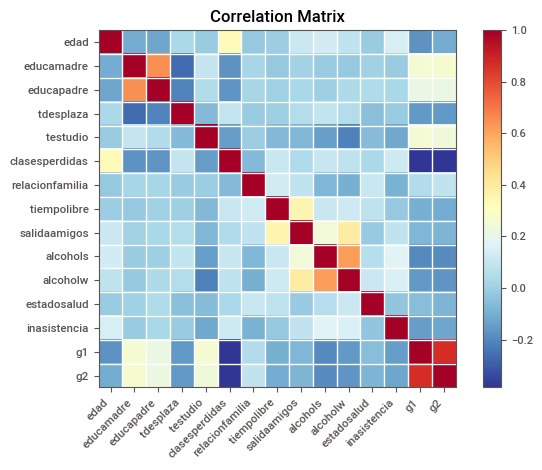

In [264]:
corr = df.set_index('g3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Separamos las variables categoricas de las discretas en dos dataframe para hacer análisis

In [265]:
dfc = df.select_dtypes(include=['object','category'])
dfd = df.select_dtypes(include='int64')




In [266]:
print('Categoricas: \n')
dfc.head(3)

Categoricas: 



,escuela,genero,ubicacion,cantfami,padreseparados,trabajomadre,trabajopadre,razón,tutor,tutorias,tutorfamilia,clasesextra,extracur,enfermeria,univer,internet,pareja
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no


In [267]:
print('Numéricas: \n')
dfd.head(3)

Numéricas: 



,edad,educamadre,educapadre,tdesplaza,testudio,clasesperdidas,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12


Haciendo una revisión de las variables, realmente sólo se identifican 4 variables numéricas, las otras son categoricas y necesitan pasar a la otra tabla, ya que son clasificaciones

In [268]:
dfc = df.loc[:,['escuela','genero','ubicacion','cantfami','padreseparados','educamadre','educapadre','trabajomadre','trabajopadre','razón','tutor','tdesplaza','testudio','clasesperdidas','tutorias','tutorfamilia','clasesextra','extracur','enfermeria','univer','internet','pareja','relacionfamilia','tiempolibre','salidaamigos','alcohols','alcoholw','estadosalud']]
dfc.head(3)

,escuela,genero,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,razón,...,enfermeria,univer,internet,pareja,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,1,1,3
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,1,1,3
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,2,3,3


In [269]:
dfd= df.loc[:,['edad','inasistencia','g1','g2','g3']]
dfd

,edad,inasistencia,g1,g2,g3
0,18,4,0,11,11
1,17,2,9,11,11
2,15,6,12,13,12
3,15,0,14,14,14
4,16,0,11,13,13
...,...,...,...,...,...
644,19,4,10,11,10
645,18,4,15,15,16
646,18,6,11,12,9
647,17,6,10,10,10


Ya extraidos los dos DataFrame, dfc para las categoricas y dfd para las numericas, se procede a hacer lo análisis de las variables

Se inicia con el análsis numérico

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

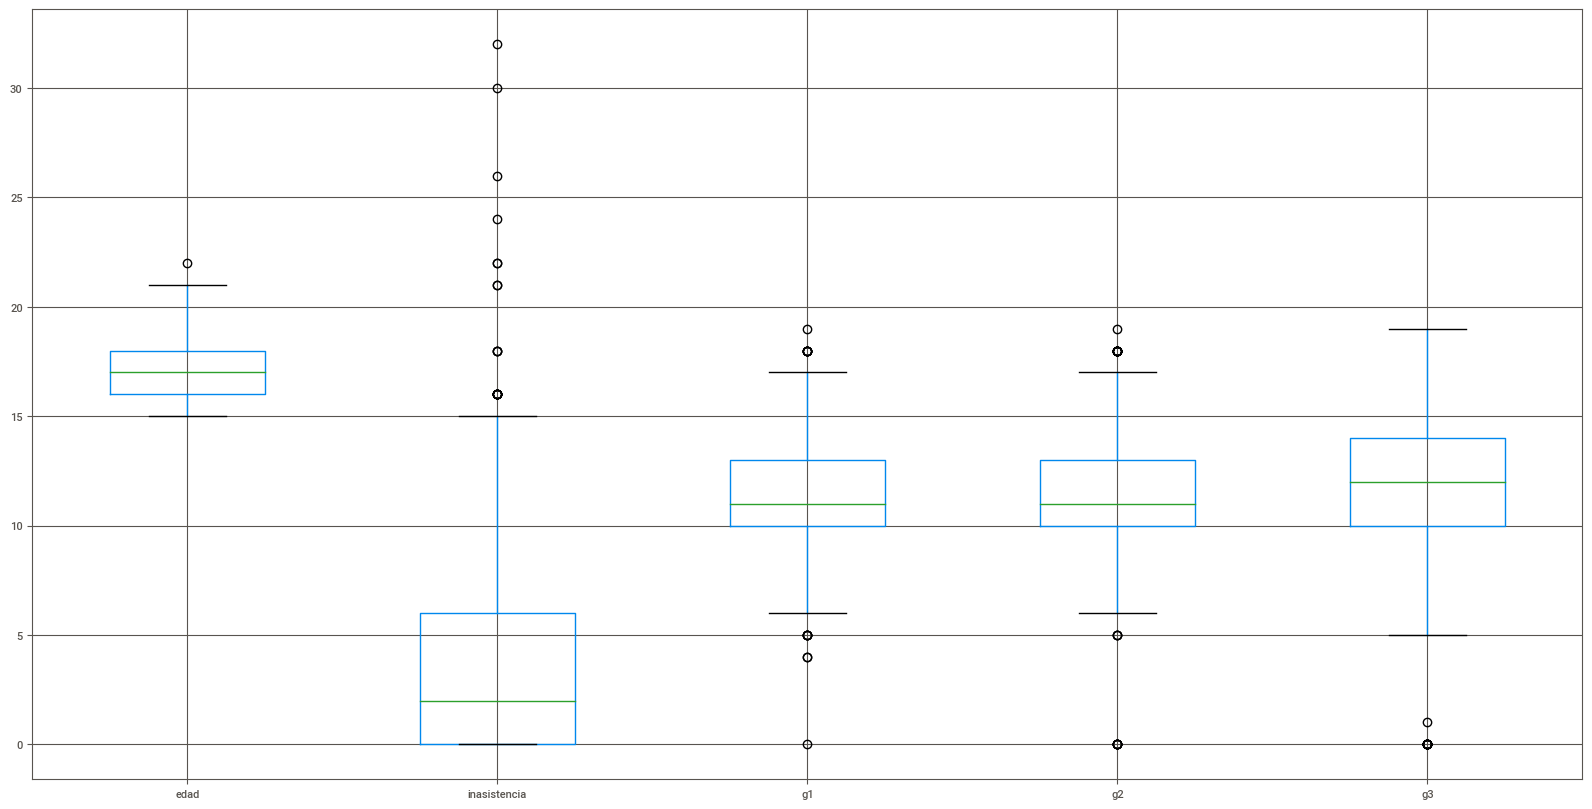

In [271]:
dfd.boxplot(return_type='dict', figsize=(20,10))
plt.show()

Identificamos Outliers en todas las variables, por lo vamos a visualizarlos para determinar si se deben quedar o es mejor removerlos de la base.

EDAD

En este caso, al ver que es un solo registro, y es superior, sabemos que es el máximo, así que mostramos el registro en la tabla.

In [242]:
max = dfd['edad'].max()
uout_edad = (df['edad']>= max)

In [243]:
out_edad = df[uout_edad]
out_edad

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
279,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,12,7,8,5


Para los demás, se procede a identificar los cuartiles de las variables, el rango intercualtil, valor máximo y mínimo, para poder identificar los outlier superiores e inferiores

INASISTENCIA

Primero se procede a identificar los cuartiles y el rango.

En este caso sabemos que sólo hay outliers superiores.

Text(0.5, 1.0, 'Inasistencia a clases')

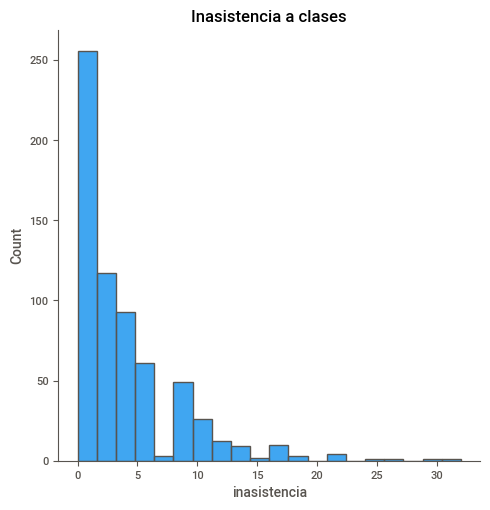

In [244]:
#sns.set(style="darkgrid")
sns.displot(x = dfd['inasistencia'], bins=20)
ax = plt.gca()
ax.set_title('Inasistencia a clases')

In [245]:
Q1_ina=dfd['inasistencia'].quantile(0.25)
print('Primer cuartil', Q1_ina)

Q3_ina=dfd['inasistencia'].quantile(0.75)
print('Tercer cuartil', Q3_ina)

IQR_ina=Q3_ina-Q1_ina
print('Rango intercuartil', IQR_ina)

Mediana_ina =dfd['inasistencia'].median()
print('Mediana', Mediana_ina)

Valor_mínimo_ina=dfd['inasistencia'].min()
print('Valor mínimo', Valor_mínimo_ina)

Valor_máximo_ina=dfd['inasistencia'].max()
print('Valor máximo', Valor_máximo_ina)

Primer cuartil 0.0
Tercer cuartil 6.0
Rango intercuartil 6.0
Mediana 2.0
Valor mínimo 0
Valor máximo 32


Se calculan los bigotes superior e inferior para determinar los registros que representan los outliers

In [246]:
BI_ina=(Q1_ina-(1.5 * IQR_ina))
print('BI_Calculado \n', BI_ina)

BS_ina=(Q3_ina+(1.5 * IQR_ina))
print('BS_Calculado \n', BS_ina)

BI_Calculado 
 -9.0
BS_Calculado 
 15.0


Se procede a identificar los registros mayores a 15 en inasistencias

In [247]:
uout_ina = ((df['inasistencia'] >BS_ina))
out_ina = df[uout_ina]
out_ina

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,16,11,11,10
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,16,11,10,10
150,GP,F,15,U,GT3,A,3,3,services,services,...,1,3,2,2,3,1,24,9,8,9
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
197,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,32,14,13,14
206,GP,M,17,U,GT3,T,1,2,at_home,services,...,4,4,4,4,5,5,16,10,11,12
211,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,3,4,3,5,3,16,10,11,12
212,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,30,14,15,16
217,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,21,13,13,13


G1

Identificamos todo nuevamente para poder determinar si es necesario remover los outliers

Text(0.5, 1.0, 'Notas G1')

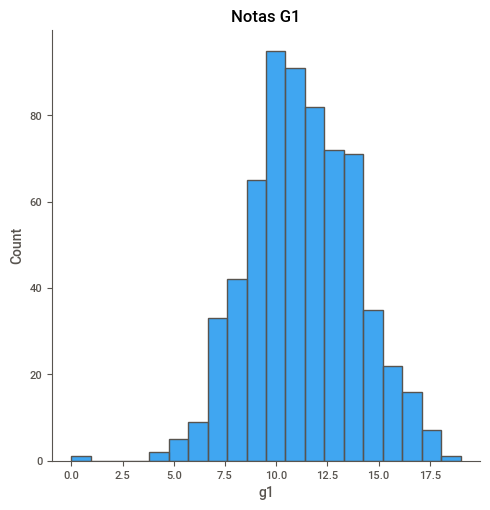

In [248]:
sns.displot(x = dfd['g1'], bins=20)
ax = plt.gca()
ax.set_title('Notas G1')

Cuartiles y rango intercuartilico de G1

In [249]:
Q1_g1=dfd['g1'].quantile(0.25)
print('Primer cuartil', Q1_g1)

Q3_g1=dfd['g1'].quantile(0.75)
print('Tercer cuartil', Q3_g1)

IQR_g1=Q3_g1-Q1_g1
print('Rango intercuartil', IQR_g1)

Mediana_g1 =dfd['g1'].median()
print('Mediana', Mediana_g1)

Valor_mínimo_g1=dfd['g1'].min()
print('Valor mínimo', Valor_mínimo_g1)

Valor_máximo_g1=dfd['g1'].max()
print('Valor máximo', Valor_máximo_g1)

Primer cuartil 10.0
Tercer cuartil 13.0
Rango intercuartil 3.0
Mediana 11.0
Valor mínimo 0
Valor máximo 19


El máximo me las notas muestra que los valores entán dentro del rango normal, así que no es necesario remover los registros, sólo son buenas notas.

G2

Se identifican los rangos y los cuartiles 

Text(0.5, 1.0, 'Notas G2')

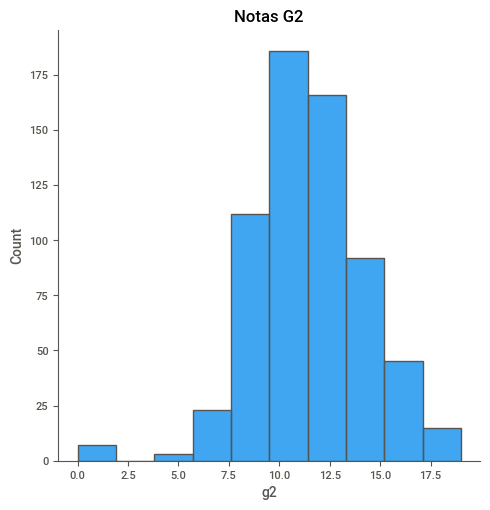

In [250]:
sns.displot(x = dfd['g2'], bins=10)
ax = plt.gca()
ax.set_title('Notas G2')

In [251]:
Q1_g2=dfd['g2'].quantile(0.25)
print('Primer cuartil', Q1_g2)

Q3_g2=dfd['g2'].quantile(0.75)
print('Tercer cuartil', Q3_g2)

IQR_g2=Q3_g2-Q1_g2
print('Rango intercuartil', IQR_g2)

Mediana_g2 =dfd['g2'].median()
print('Mediana', Mediana_g2)

Valor_mínimo_g2=dfd['g2'].min()
print('Valor mínimo', Valor_mínimo_g2)

Valor_máximo_g2=dfd['g2'].max()
print('Valor máximo', Valor_máximo_g2)

Primer cuartil 10.0
Tercer cuartil 13.0
Rango intercuartil 3.0
Mediana 11.0
Valor mínimo 0
Valor máximo 19


Nuevamente los outliers están dentro del rango normal de las calificaciones, así que no deben ser removidos

G3

Se identifican el rango intercuartil y los cuartiles.

Text(0.5, 1.0, 'Notas G3')

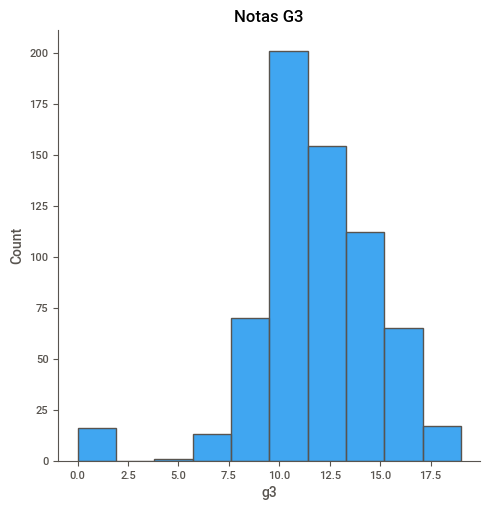

In [252]:
sns.displot(x = dfd['g3'], bins=10)
ax = plt.gca()
ax.set_title('Notas G3')

In [253]:
Q1_g3=dfd['g3'].quantile(0.25)
print('Primer cuartil', Q1_g3)

Q3_g3=dfd['g3'].quantile(0.75)
print('Tercer cuartil', Q3_g3)

IQR_g3=Q3_g3-Q1_g3
print('Rango intercuartil', IQR_g3)

Mediana_g3 =dfd['g3'].median()
print('Mediana', Mediana_g3)

Valor_mínimo_g3=dfd['g3'].min()
print('Valor mínimo', Valor_mínimo_g3)

Valor_máximo_g3=dfd['g3'].max()
print('Valor máximo', Valor_máximo_g3)

Primer cuartil 10.0
Tercer cuartil 14.0
Rango intercuartil 4.0
Mediana 12.0
Valor mínimo 0
Valor máximo 19


los outliers se encuentran dentro del rango normal, por lo tanto no se remueven.

### Se continua con el análsis categorico

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



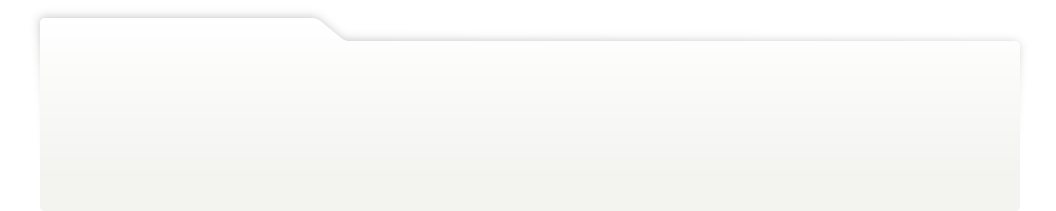
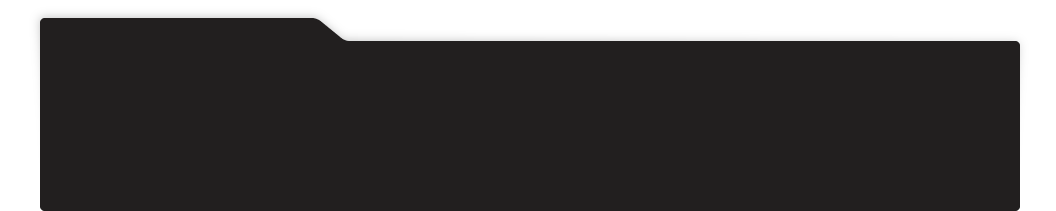
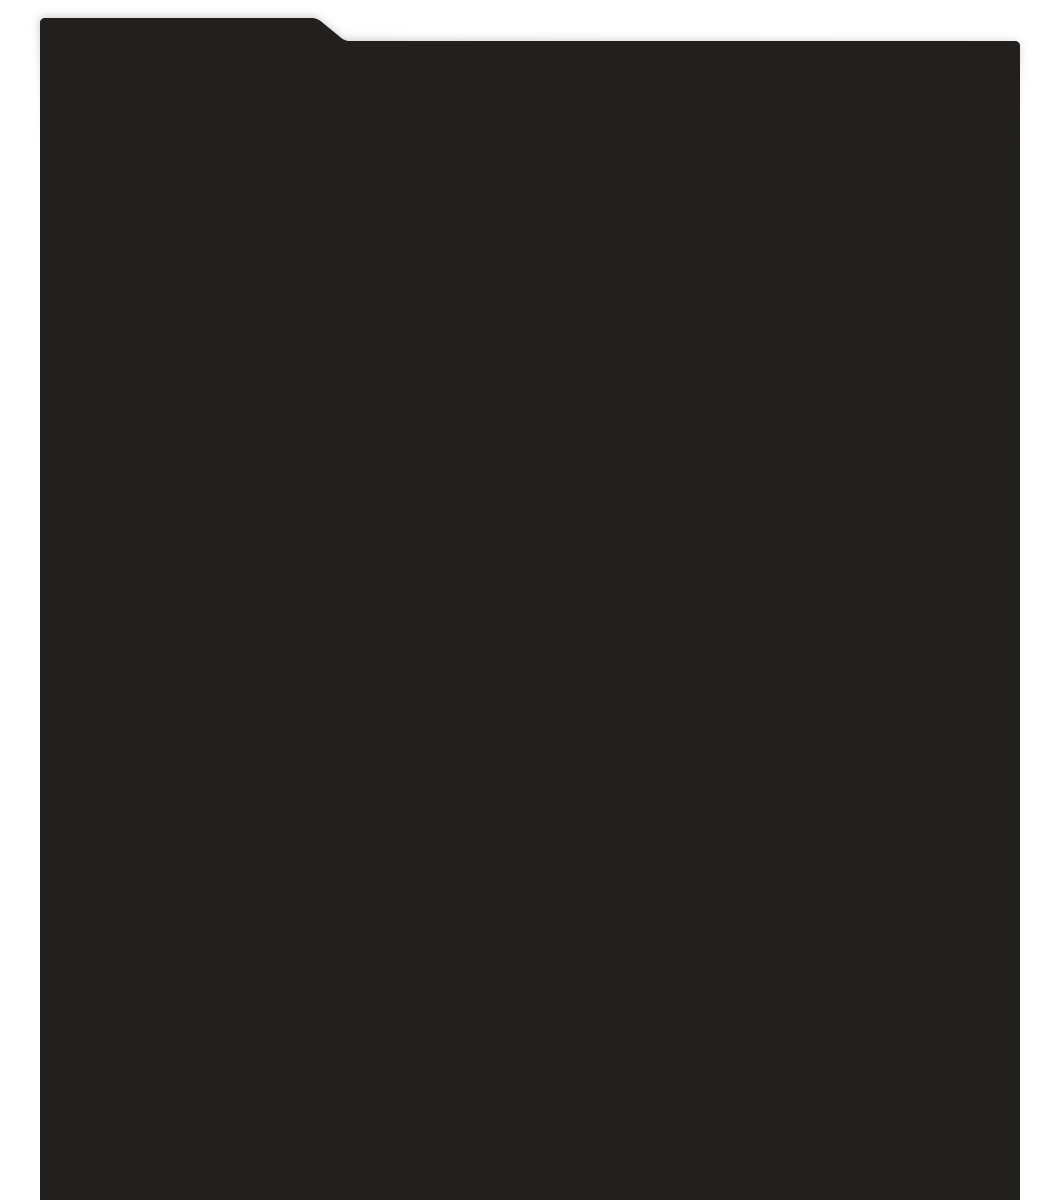
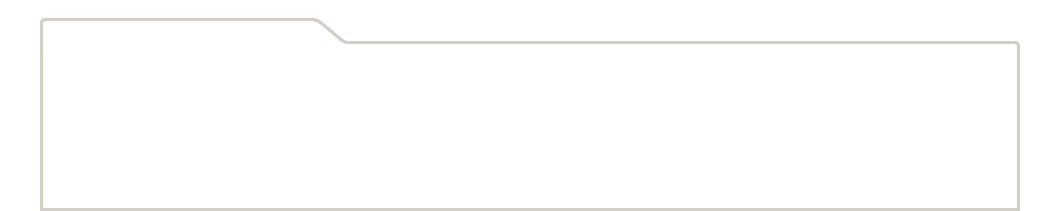
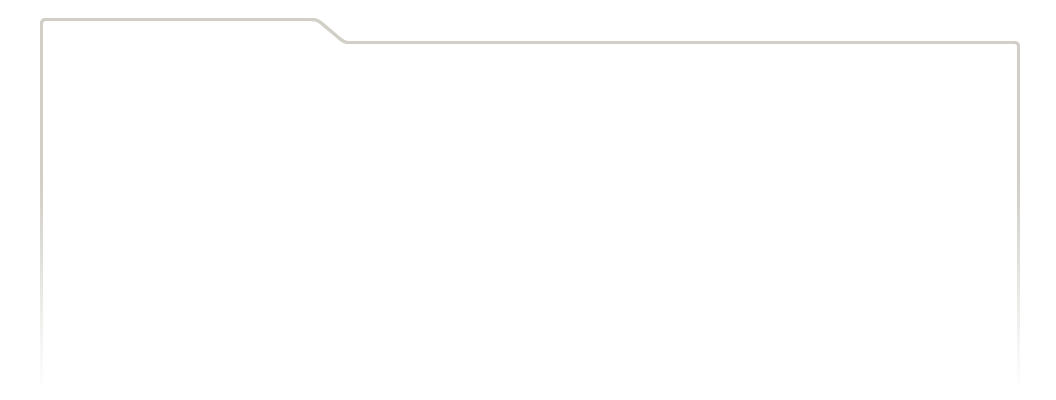
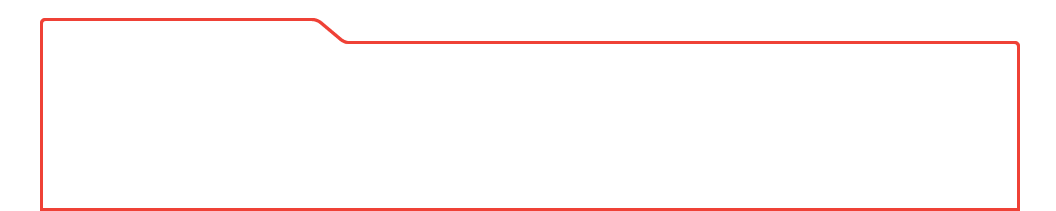
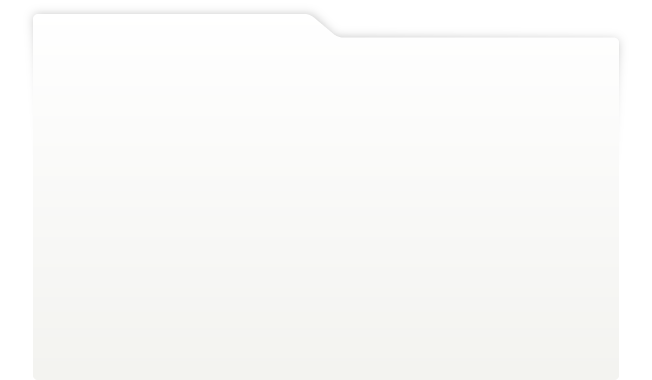
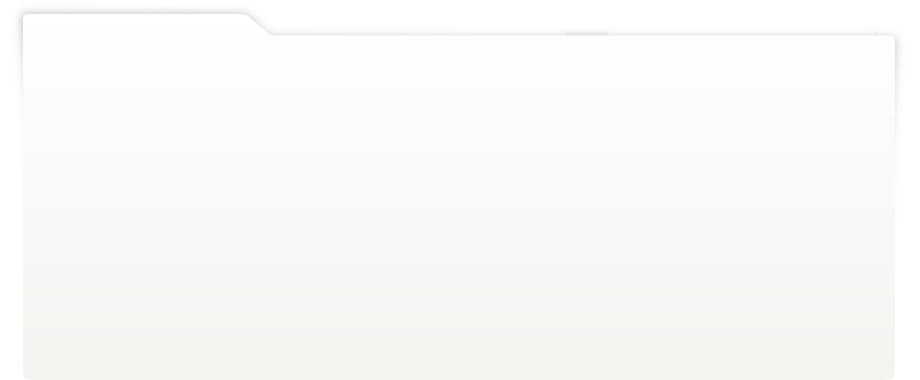
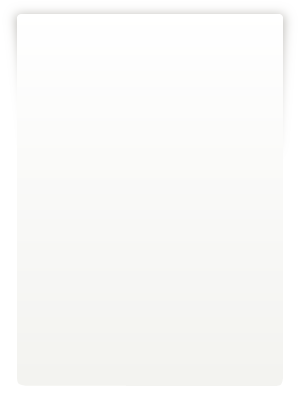
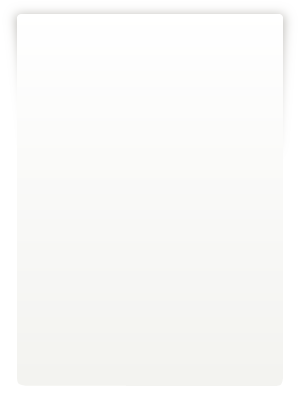
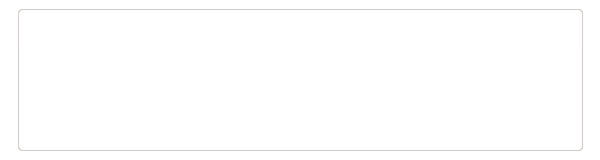
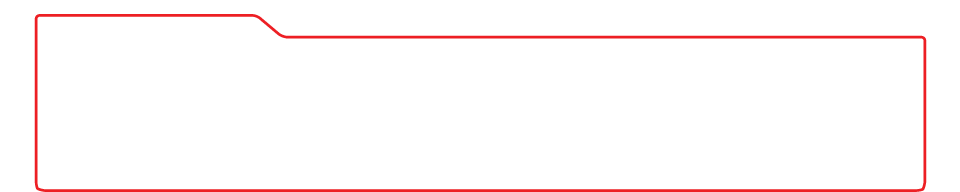
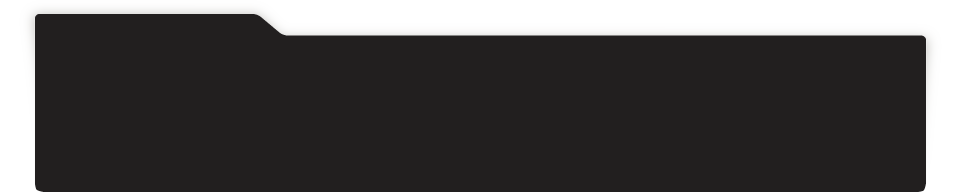
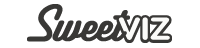
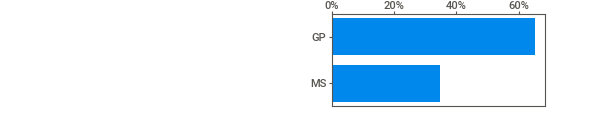
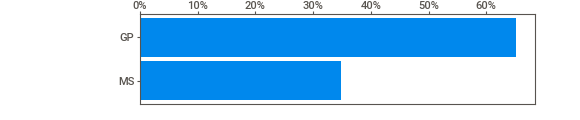
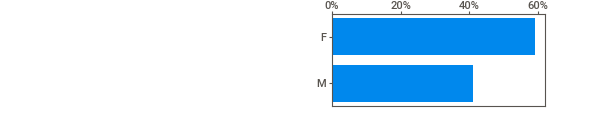
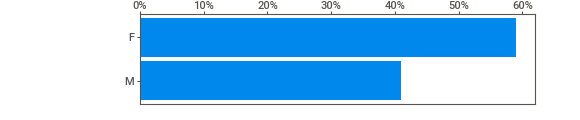
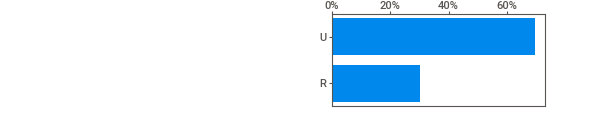
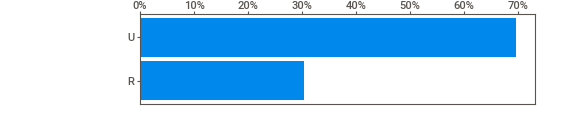
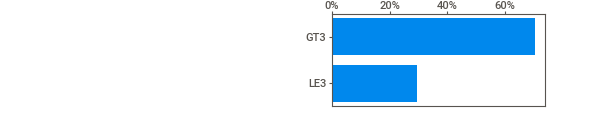
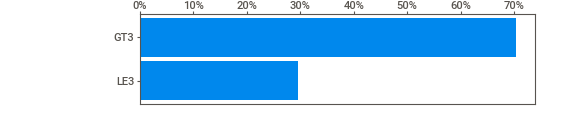
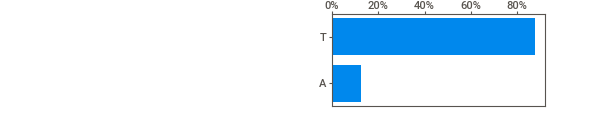
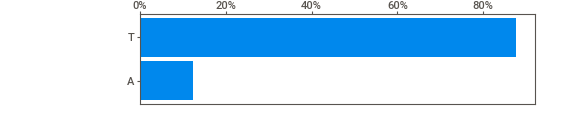
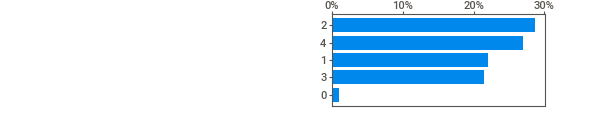
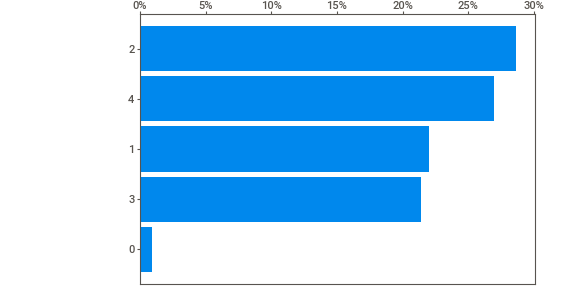
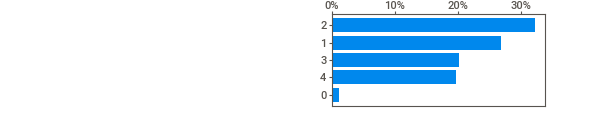
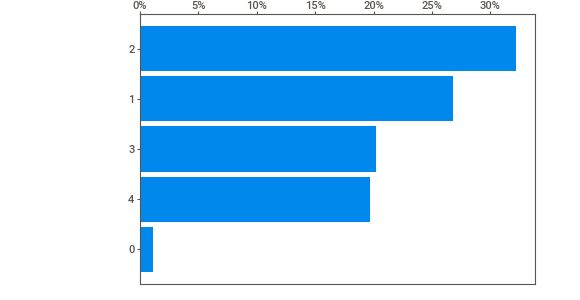
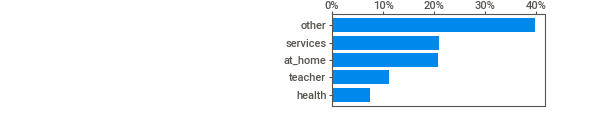
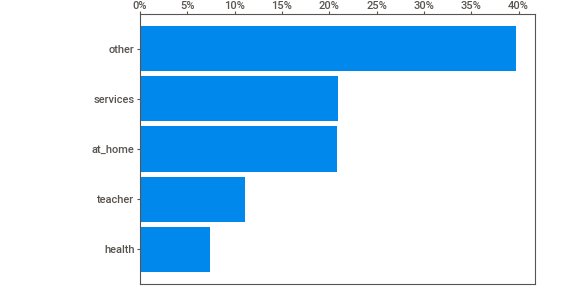
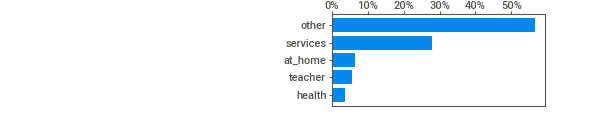
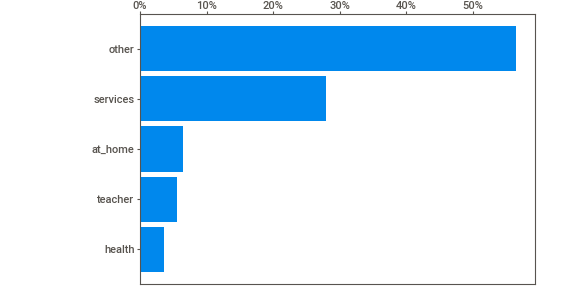
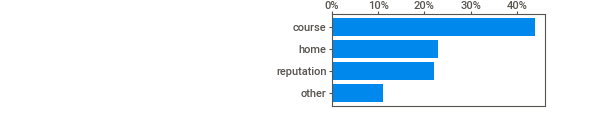
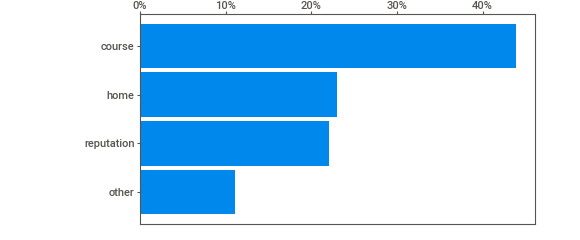
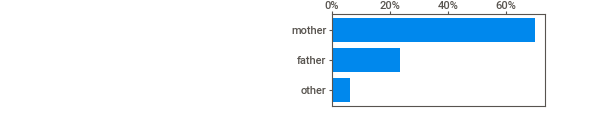
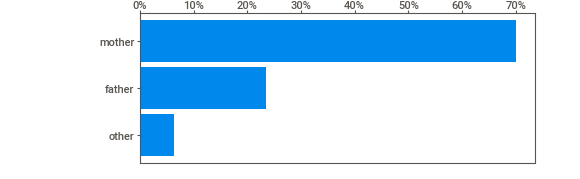
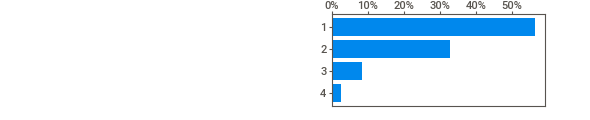
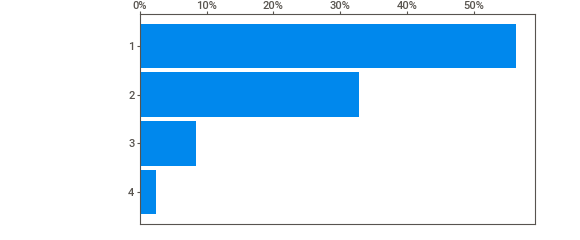
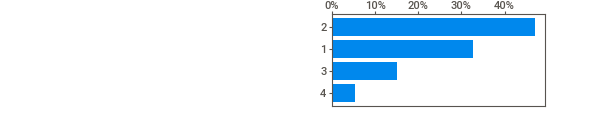
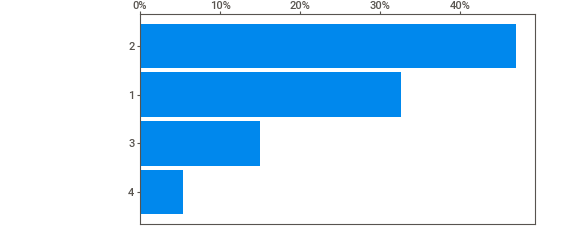
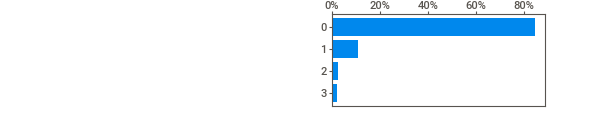
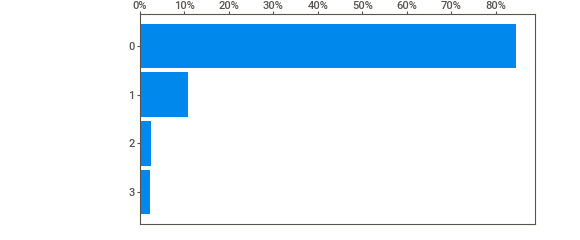
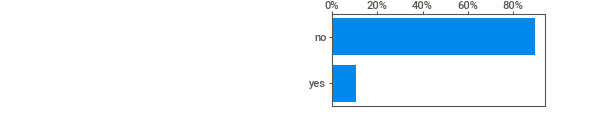
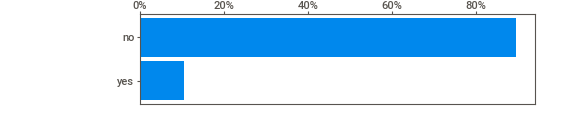
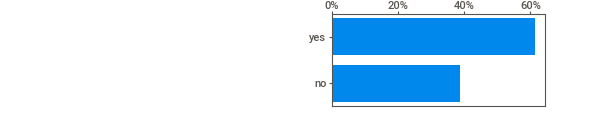
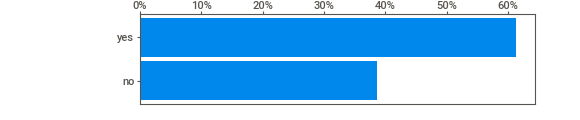
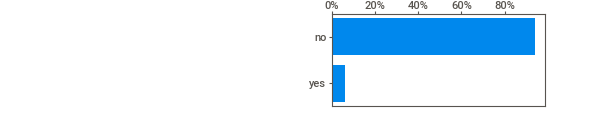
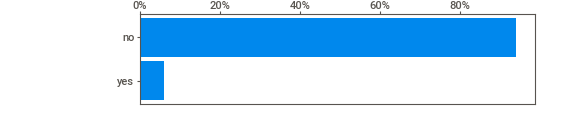
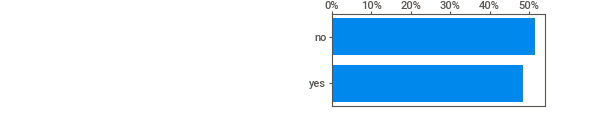
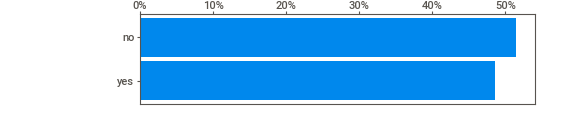
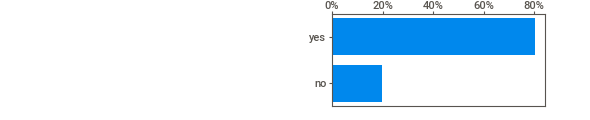
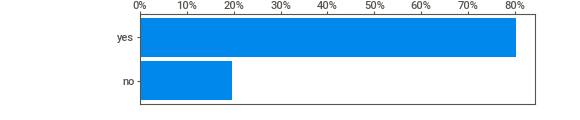
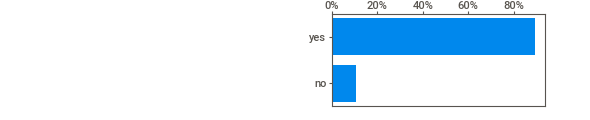
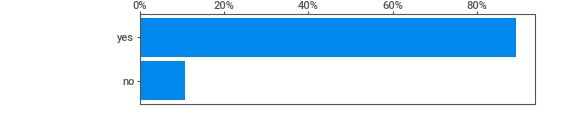
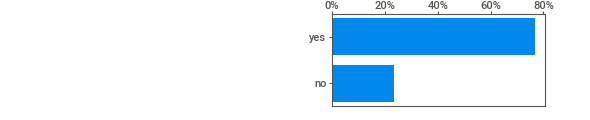
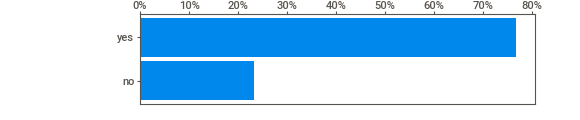
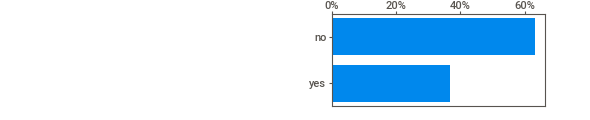
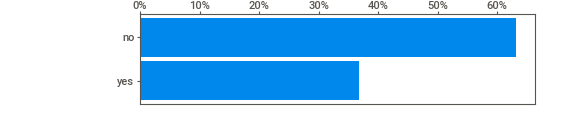
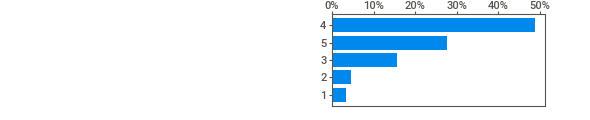
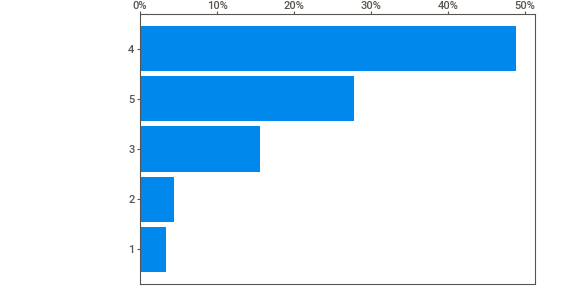
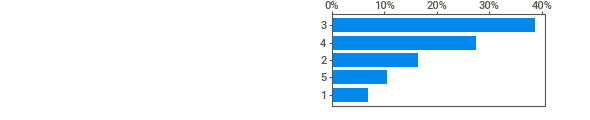
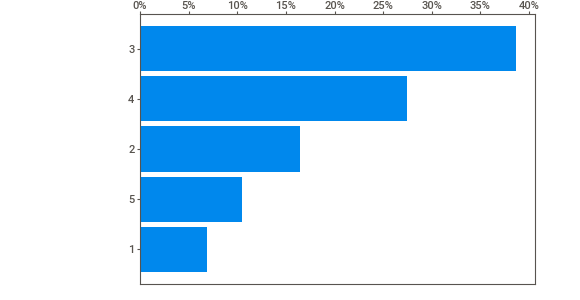
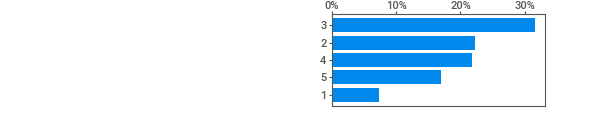
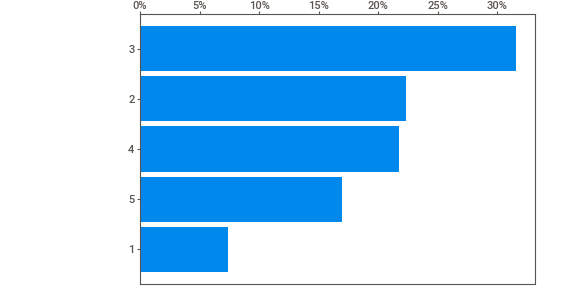
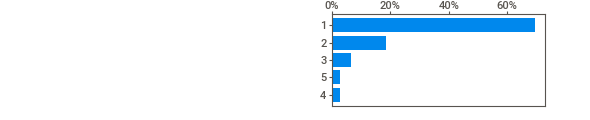
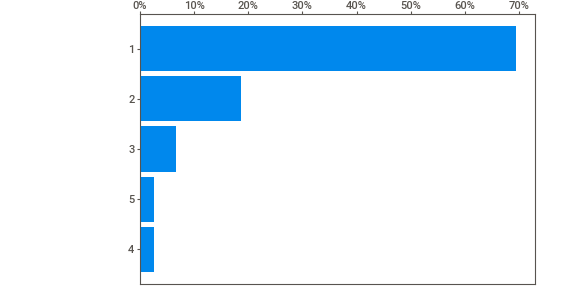
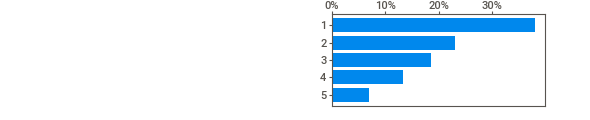
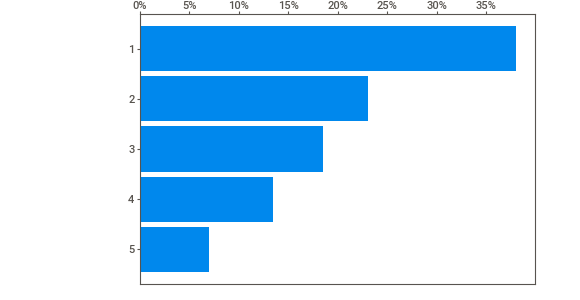
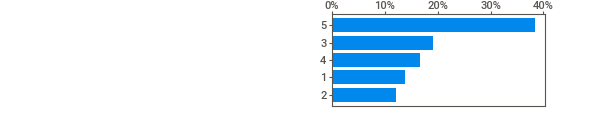
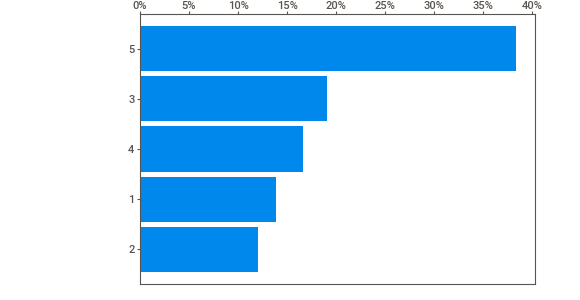
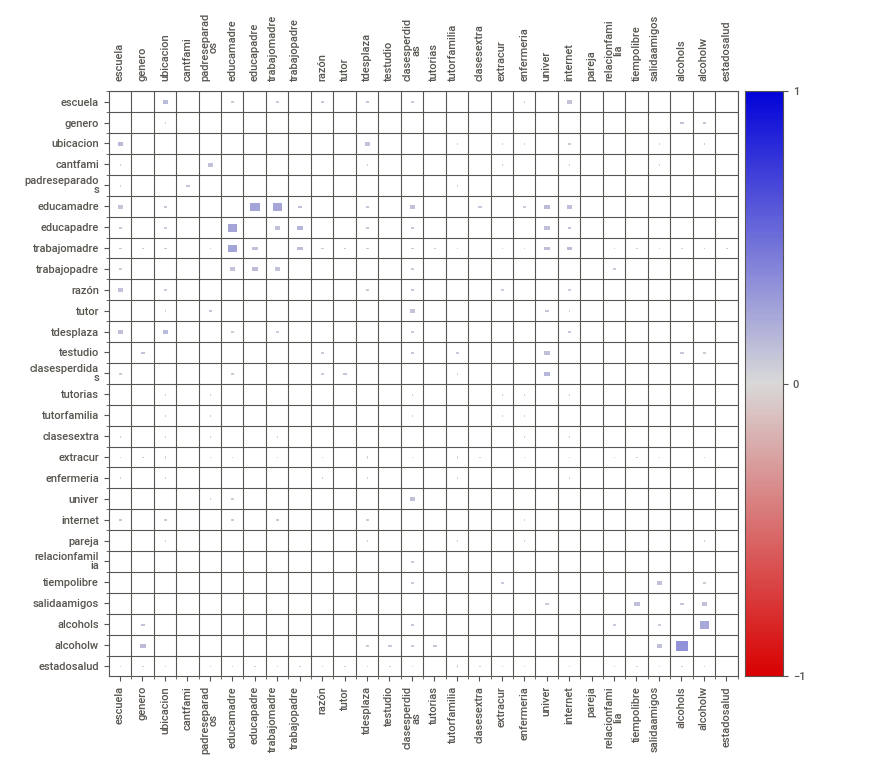
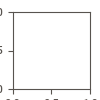

In [254]:
reporte = sv.analyze(dfc)
reporte.show_html()
HTML('SWEETVIZ_REPORT.html')

In [88]:
print(pd.value_counts(dfc['escuela']))
print(' ')
print(100 * dfc['escuela'].value_counts() / len(dfc['escuela']))

GP    423
MS    226
Name: escuela, dtype: int64
 
GP    65.177196
MS    34.822804
Name: escuela, dtype: float64


<AxesSubplot:title={'center':'escuela %'}>

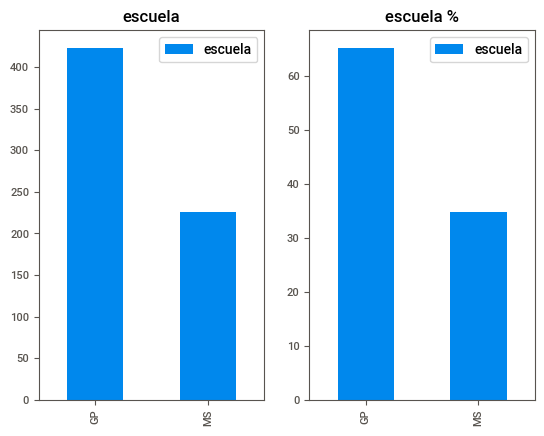

In [194]:
dfc1 = pd.DataFrame(dfc['escuela'].value_counts())
dfc1p = pd.DataFrame(100 * dfc['escuela'].value_counts() / len(dfc['escuela']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc1.plot.bar(ax=axes[0], title='escuela')
dfc1p.plot.bar(ax=axes[1], title='escuela %')

In [94]:
print(pd.value_counts(dfc['genero']))
print(' ')
print(100 * dfc['genero'].value_counts() / len(dfc['genero']))

F    383
M    266
Name: genero, dtype: int64
 
F    59.013867
M    40.986133
Name: genero, dtype: float64


<AxesSubplot:title={'center':'genero %'}>

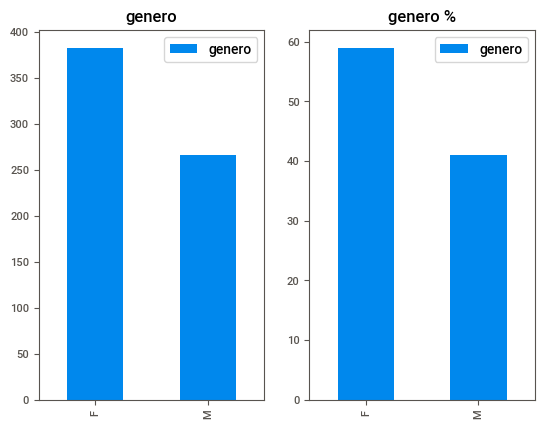

In [195]:
dfc2 = pd.DataFrame(dfc['genero'].value_counts())
dfc2p = pd.DataFrame(100 * dfc['genero'].value_counts() / len(dfc['genero']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc2.plot.bar(ax=axes[0], title='genero')
dfc2p.plot.bar(ax=axes[1], title='genero %')

In [102]:
print(pd.value_counts(dfc['ubicacion']))
print(' ')
print(100 * dfc['ubicacion'].value_counts() / len(dfc['ubicacion']))

U    452
R    197
Name: ubicacion, dtype: int64
 
U    69.645609
R    30.354391
Name: ubicacion, dtype: float64


<AxesSubplot:title={'center':'ubicacion %'}>

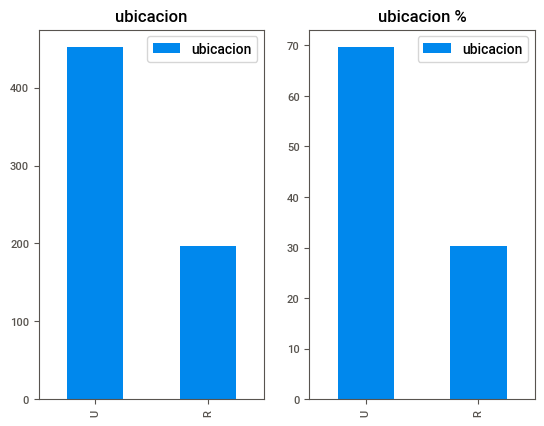

In [196]:
dfc3 = pd.DataFrame(dfc['ubicacion'].value_counts())
dfc3p = pd.DataFrame(100 * dfc['ubicacion'].value_counts() / len(dfc['ubicacion']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc3.plot.bar(ax=axes[0], title='ubicacion')
dfc3p.plot.bar(ax=axes[1], title='ubicacion %')

In [105]:
print(pd.value_counts(dfc['cantfami']))
print(' ')
print(100 * dfc['cantfami'].value_counts() / len(dfc['cantfami']))

GT3    457
LE3    192
Name: cantfami, dtype: int64
 
GT3    70.416025
LE3    29.583975
Name: cantfami, dtype: float64


<AxesSubplot:title={'center':'Tamaño de familia %'}>

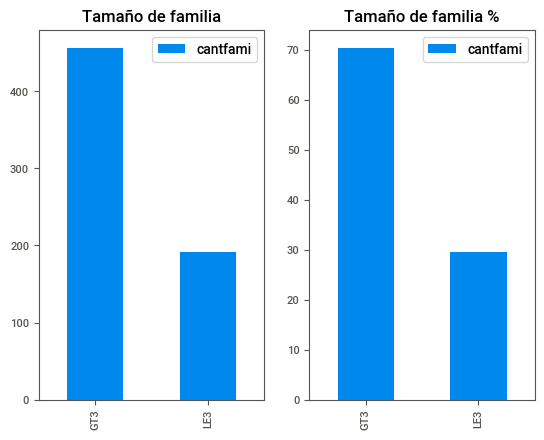

In [197]:
dfc4 = pd.DataFrame(dfc['cantfami'].value_counts())
dfc4p = pd.DataFrame(100 * dfc['cantfami'].value_counts() / len(dfc['cantfami']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc4.plot.bar(ax=axes[0], title='Tamaño de familia')
dfc4p.plot.bar(ax=axes[1], title='Tamaño de familia %')

In [108]:
print(pd.value_counts(dfc['padreseparados']))
print(' ')
print(100 * dfc['padreseparados'].value_counts() / len(dfc['padreseparados']))

T    569
A     80
Name: padreseparados, dtype: int64
 
T    87.673344
A    12.326656
Name: padreseparados, dtype: float64


<AxesSubplot:title={'center':'Padres separados %'}>

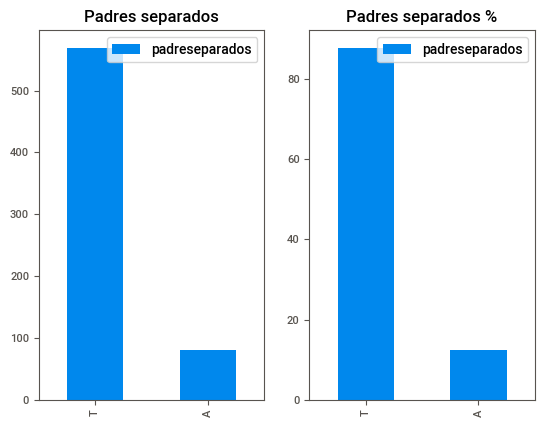

In [198]:
dfc5 = pd.DataFrame(dfc['padreseparados'].value_counts())
dfc5p = pd.DataFrame(100 * dfc['padreseparados'].value_counts() / len(dfc['padreseparados']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc5.plot.bar(ax=axes[0], title='Padres separados')
dfc5p.plot.bar(ax=axes[1], title='Padres separados %')

In [135]:
print(pd.value_counts(dfc['educamadre']))
print(' ')
print(100 * dfc['educamadre'].value_counts() / len(dfc['educamadre']))

2    186
4    175
1    143
3    139
0      6
Name: educamadre, dtype: int64
 
2    28.659476
4    26.964561
1    22.033898
3    21.417565
0     0.924499
Name: educamadre, dtype: float64


<AxesSubplot:title={'center':'Educacion de la madre %'}>

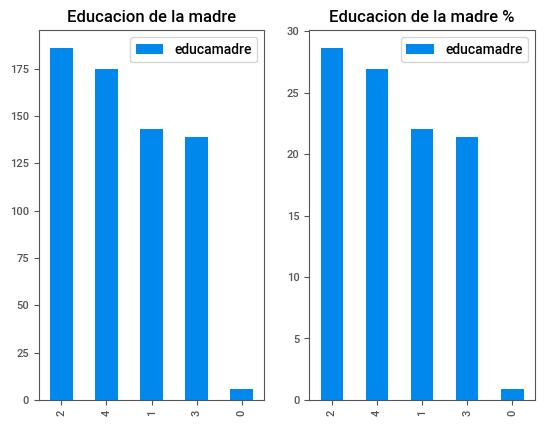

In [199]:
dfc6 = pd.DataFrame(dfc['educamadre'].value_counts())
dfc6p = pd.DataFrame(100 * dfc['educamadre'].value_counts() / len(dfc['educamadre']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc6.plot.bar(ax=axes[0], title='Educacion de la madre')
dfc6p.plot.bar(ax=axes[1], title='Educacion de la madre %')

In [136]:
print(pd.value_counts(dfc['educapadre']))
print(' ')
print(100 * dfc['educapadre'].value_counts() / len(dfc['educapadre']))

2    209
1    174
3    131
4    128
0      7
Name: educapadre, dtype: int64
 
2    32.203390
1    26.810478
3    20.184900
4    19.722650
0     1.078582
Name: educapadre, dtype: float64


<AxesSubplot:title={'center':'Educacion del padre %'}>

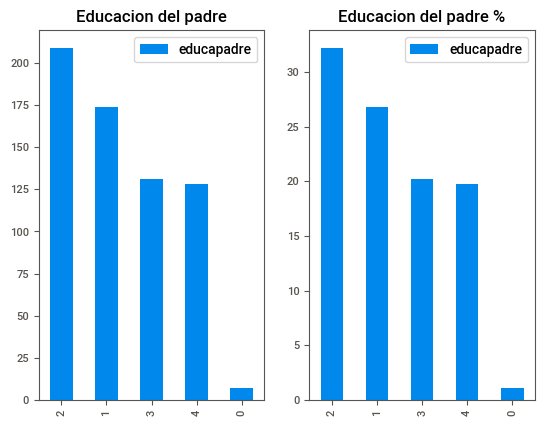

In [201]:
dfc7 = pd.DataFrame(dfc['educapadre'].value_counts())
dfc7p = pd.DataFrame(100 * dfc['educapadre'].value_counts() / len(dfc['educapadre']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc7.plot.bar(ax=axes[0], title='Educacion del padre')
dfc7p.plot.bar(ax=axes[1], title='Educacion del padre %')

In [139]:
print(pd.value_counts(dfc['trabajomadre']))
print(' ')
print(100 * dfc['trabajomadre'].value_counts() / len(dfc['trabajomadre']))

other       258
services    136
at_home     135
teacher      72
health       48
Name: trabajomadre, dtype: int64
 
other       39.753467
services    20.955316
at_home     20.801233
teacher     11.093991
health       7.395994
Name: trabajomadre, dtype: float64


<AxesSubplot:title={'center':'Trabajo de la madre %'}>

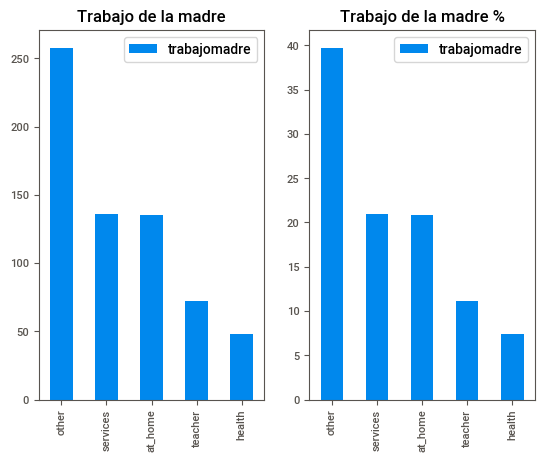

In [202]:
dfc8 = pd.DataFrame(dfc['trabajomadre'].value_counts())
dfc8p = pd.DataFrame(100 * dfc['trabajomadre'].value_counts() / len(dfc['trabajomadre']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc8.plot.bar(ax=axes[0], title='Trabajo de la madre')
dfc8p.plot.bar(ax=axes[1], title='Trabajo de la madre %')

In [142]:
print(pd.value_counts(dfc['trabajopadre']))
print(' ')
print(100 * dfc['trabajopadre'].value_counts() / len(dfc['trabajopadre']))

other       367
services    181
at_home      42
teacher      36
health       23
Name: trabajopadre, dtype: int64
 
other       56.548536
services    27.889060
at_home      6.471495
teacher      5.546995
health       3.543914
Name: trabajopadre, dtype: float64


<AxesSubplot:title={'center':'Trabajo del padre %'}>

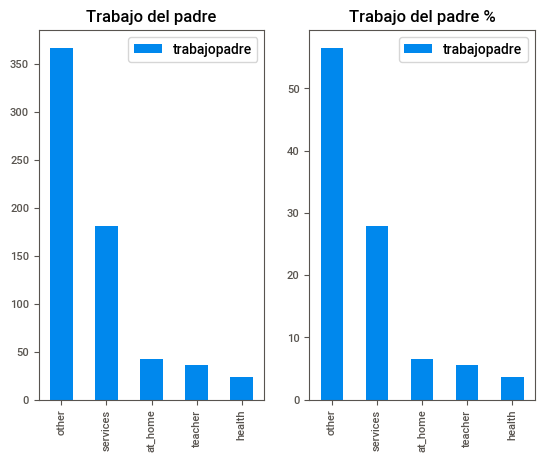

In [203]:
dfc9 = pd.DataFrame(dfc['trabajopadre'].value_counts())
dfc9p = pd.DataFrame(100 * dfc['trabajopadre'].value_counts() / len(dfc['trabajopadre']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc9.plot.bar(ax=axes[0], title='Trabajo del padre')
dfc9p.plot.bar(ax=axes[1], title='Trabajo del padre %')

In [145]:
print(pd.value_counts(dfc['razón']))
print(' ')
print(100 * dfc['razón'].value_counts() / len(dfc['razón']))

course        285
home          149
reputation    143
other          72
Name: razón, dtype: int64
 
course        43.913713
home          22.958398
reputation    22.033898
other         11.093991
Name: razón, dtype: float64


<AxesSubplot:title={'center':'Razón %'}>

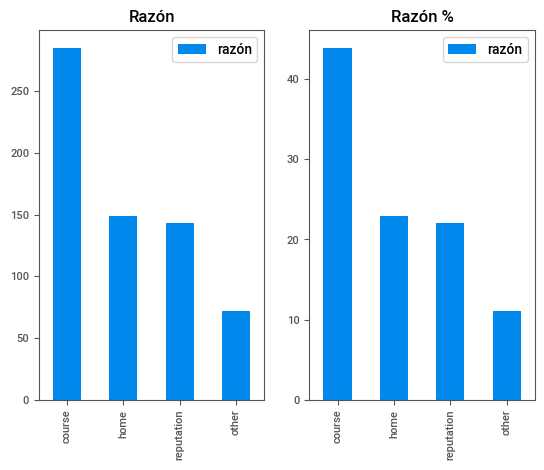

In [204]:
dfc10 = pd.DataFrame(dfc['razón'].value_counts())
dfc10p = pd.DataFrame(100 * dfc['razón'].value_counts() / len(dfc['razón']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc10.plot.bar(ax=axes[0], title='Razón')
dfc10p.plot.bar(ax=axes[1], title='Razón %')

In [148]:
print(pd.value_counts(dfc['tutor']))
print(' ')
print(100 * dfc['tutor'].value_counts() / len(dfc['tutor']))

mother    455
father    153
other      41
Name: tutor, dtype: int64
 
mother    70.107858
father    23.574730
other      6.317411
Name: tutor, dtype: float64


<AxesSubplot:title={'center':'¿Quien es el tutor? %'}>

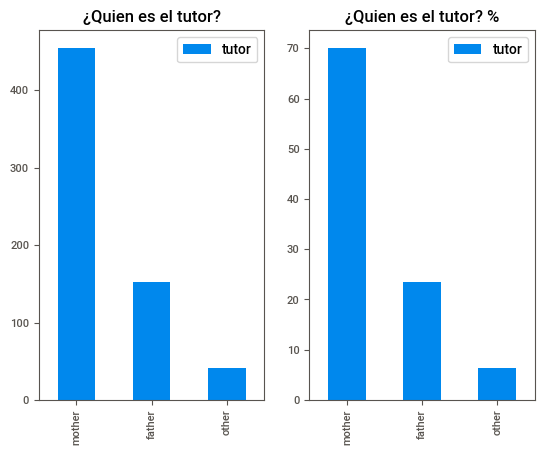

In [205]:
dfc11 = pd.DataFrame(dfc['tutor'].value_counts())
dfc11p = pd.DataFrame(100 * dfc['tutor'].value_counts() / len(dfc['tutor']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc11.plot.bar(ax=axes[0], title='¿Quien es el tutor?')
dfc11p.plot.bar(ax=axes[1], title='¿Quien es el tutor? %')

In [153]:
print(pd.value_counts(dfc['tdesplaza']))
print(' ')
print(100 * dfc['tdesplaza'].value_counts() / len(dfc['tdesplaza']))

1    366
2    213
3     54
4     16
Name: tdesplaza, dtype: int64
 
1    56.394453
2    32.819723
3     8.320493
4     2.465331
Name: tdesplaza, dtype: float64


<AxesSubplot:title={'center':'Tiempo de desplazamiento%'}>

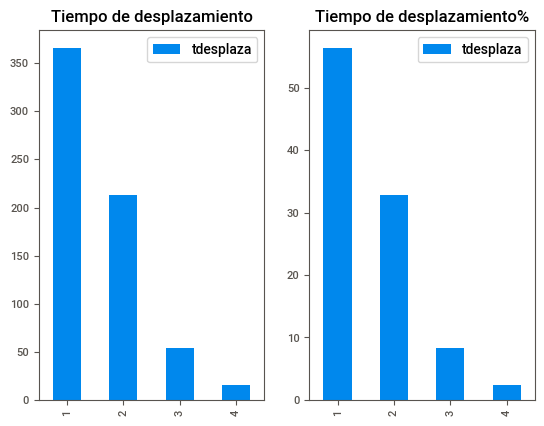

In [206]:
dfc12 = pd.DataFrame(dfc['tdesplaza'].value_counts())
dfc12p = pd.DataFrame(100 * dfc['tdesplaza'].value_counts() / len(dfc['tdesplaza']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc12.plot.bar(ax=axes[0], title='Tiempo de desplazamiento')
dfc12p.plot.bar(ax=axes[1], title='Tiempo de desplazamiento%')

In [156]:
print(pd.value_counts(dfc['testudio']))
print(' ')
print(100 * dfc['testudio'].value_counts() / len(dfc['testudio']))

2    305
1    212
3     97
4     35
Name: testudio, dtype: int64
 
2    46.995378
1    32.665639
3    14.946071
4     5.392912
Name: testudio, dtype: float64


<AxesSubplot:title={'center':'Tiempo de estudio %'}>

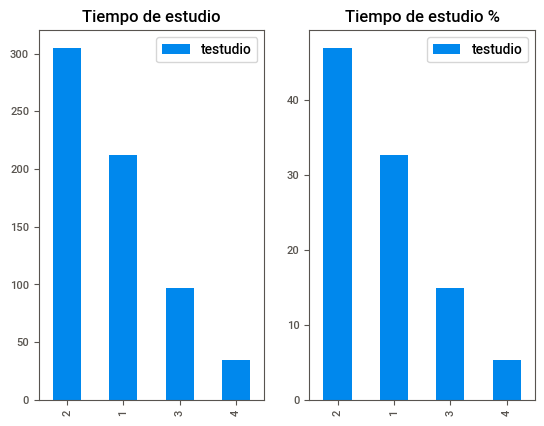

In [208]:
dfc13 = pd.DataFrame(dfc['testudio'].value_counts())
dfc13p = pd.DataFrame(100 * dfc['testudio'].value_counts() / len(dfc['testudio']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc13.plot.bar(ax=axes[0], title='Tiempo de estudio')
dfc13p.plot.bar(ax=axes[1], title='Tiempo de estudio %')

In [159]:
print(pd.value_counts(dfc['clasesperdidas']))
print(' ')
print(100 * dfc['clasesperdidas'].value_counts() / len(dfc['clasesperdidas']))

0    549
1     70
2     16
3     14
Name: clasesperdidas, dtype: int64
 
0    84.591680
1    10.785824
2     2.465331
3     2.157165
Name: clasesperdidas, dtype: float64


<AxesSubplot:title={'center':'Clases perdidas %'}>

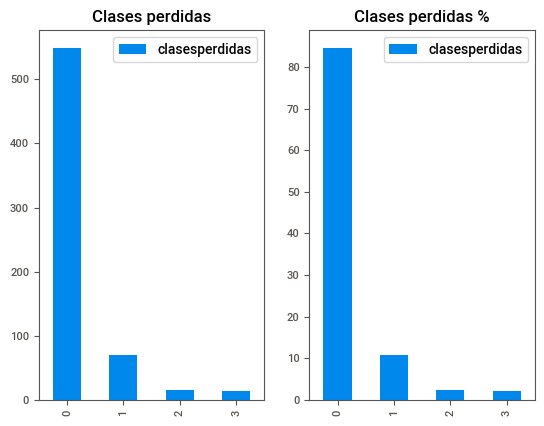

In [209]:
dfc14 = pd.DataFrame(dfc['clasesperdidas'].value_counts())
dfc14p = pd.DataFrame(100 * dfc['clasesperdidas'].value_counts() / len(dfc['clasesperdidas']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc14.plot.bar(ax=axes[0], title='Clases perdidas')
dfc14p.plot.bar(ax=axes[1], title='Clases perdidas %')

In [162]:
print(pd.value_counts(dfc['tutorias']))
print(' ')
print(100 * dfc['tutorias'].value_counts() / len(dfc['tutorias']))

no     581
yes     68
Name: tutorias, dtype: int64
 
no     89.522342
yes    10.477658
Name: tutorias, dtype: float64


<AxesSubplot:title={'center':'Tutorias %'}>

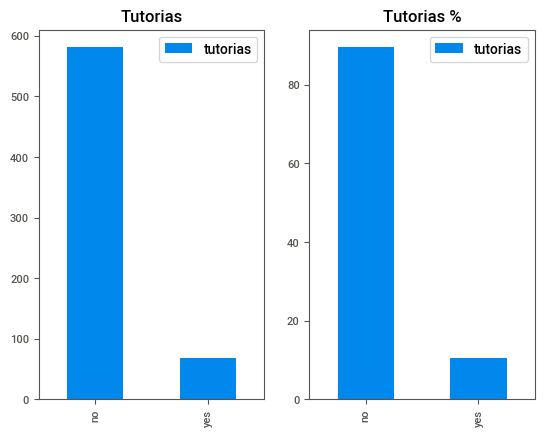

In [210]:
dfc15 = pd.DataFrame(dfc['tutorias'].value_counts())
dfc15p = pd.DataFrame(100 * dfc['tutorias'].value_counts() / len(dfc['tutorias']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc15.plot.bar(ax=axes[0], title='Tutorias')
dfc15p.plot.bar(ax=axes[1], title='Tutorias %')

In [212]:
print(pd.value_counts(dfc['tutorfamilia']))
print(' ')
print(100 * dfc['tutorfamilia'].value_counts() / len(dfc['tutorfamilia']))

yes    398
no     251
Name: tutorfamilia, dtype: int64
 
yes    61.325116
no     38.674884
Name: tutorfamilia, dtype: float64


<AxesSubplot:title={'center':'Tutor Familia %'}>

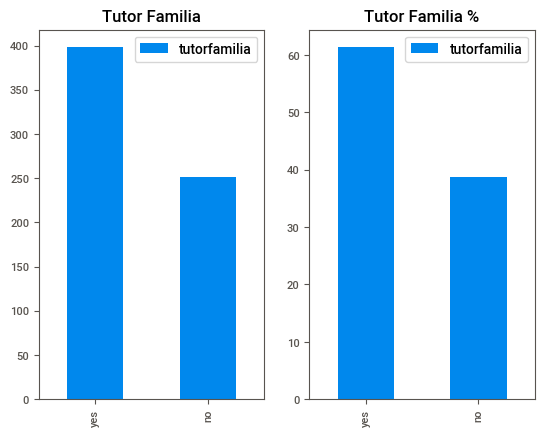

In [211]:
dfc16 = pd.DataFrame(dfc['tutorfamilia'].value_counts())
dfc16p = pd.DataFrame(100 * dfc['tutorfamilia'].value_counts() / len(dfc['tutorfamilia']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc16.plot.bar(ax=axes[0], title='Tutor Familia')
dfc16p.plot.bar(ax=axes[1], title='Tutor Familia %')

In [213]:
print(pd.value_counts(dfc['clasesextra']))
print(' ')
print(100 * dfc['clasesextra'].value_counts() / len(dfc['clasesextra']))

no     610
yes     39
Name: clasesextra, dtype: int64
 
no     93.990755
yes     6.009245
Name: clasesextra, dtype: float64


<AxesSubplot:title={'center':'Clases extras %'}>

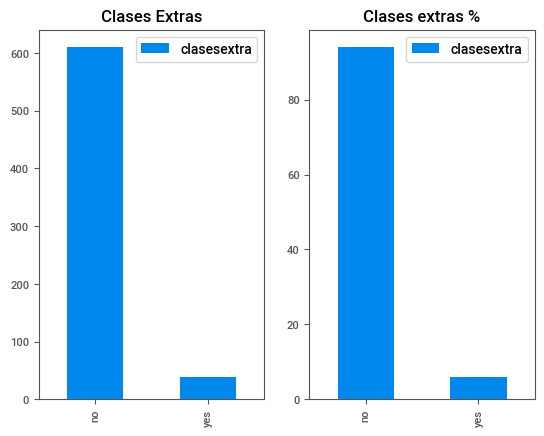

In [217]:
dfc17 = pd.DataFrame(dfc['clasesextra'].value_counts())
dfc17p = pd.DataFrame(100 * dfc['clasesextra'].value_counts() / len(dfc['clasesextra']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc17.plot.bar(ax=axes[0], title='Clases Extras')
dfc17p.plot.bar(ax=axes[1], title='Clases extras %')

In [218]:
print(pd.value_counts(dfc['extracur']))
print(' ')
print(100 * dfc['extracur'].value_counts() / len(dfc['extracur']))

no     334
yes    315
Name: extracur, dtype: int64
 
no     51.46379
yes    48.53621
Name: extracur, dtype: float64


<AxesSubplot:title={'center':'Actividades Extracurriculares %'}>

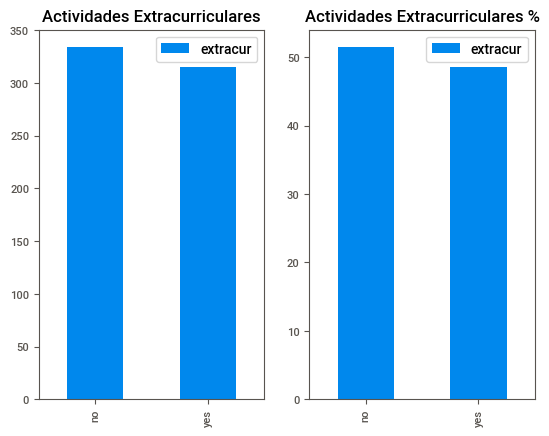

In [219]:
dfc18 = pd.DataFrame(dfc['extracur'].value_counts())
dfc18p = pd.DataFrame(100 * dfc['extracur'].value_counts() / len(dfc['extracur']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc18.plot.bar(ax=axes[0], title='Actividades Extracurriculares')
dfc18p.plot.bar(ax=axes[1], title='Actividades Extracurriculares %')

In [220]:
print(pd.value_counts(dfc['enfermeria']))
print(' ')
print(100 * dfc['enfermeria'].value_counts() / len(dfc['enfermeria']))

yes    521
no     128
Name: enfermeria, dtype: int64
 
yes    80.27735
no     19.72265
Name: enfermeria, dtype: float64


<AxesSubplot:title={'center':'Atendido en enfermeria %'}>

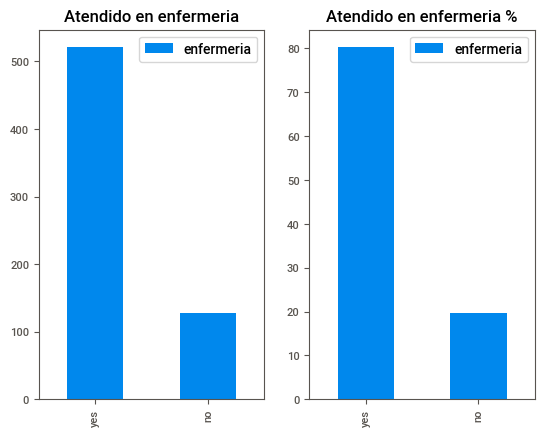

In [221]:
dfc19 = pd.DataFrame(dfc['enfermeria'].value_counts())
dfc19p = pd.DataFrame(100 * dfc['enfermeria'].value_counts() / len(dfc['enfermeria']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc19.plot.bar(ax=axes[0], title='Atendido en enfermeria')
dfc19p.plot.bar(ax=axes[1], title='Atendido en enfermeria %')

In [222]:
print(pd.value_counts(dfc['univer']))
print(' ')
print(100 * dfc['univer'].value_counts() / len(dfc['univer']))

yes    580
no      69
Name: univer, dtype: int64
 
yes    89.368259
no     10.631741
Name: univer, dtype: float64


<AxesSubplot:title={'center':'¿Quiere estudiar en la universidad? %'}>

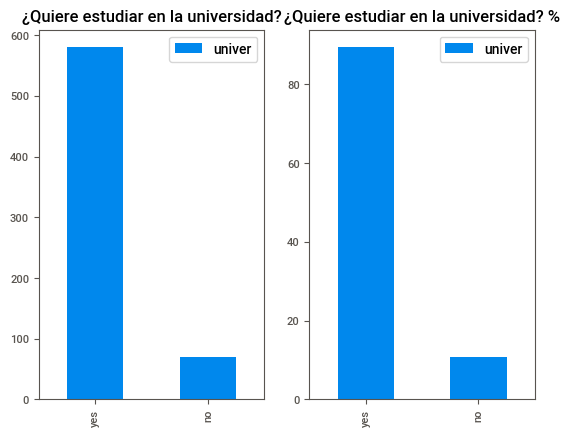

In [223]:
dfc20 = pd.DataFrame(dfc['univer'].value_counts())
dfc20p = pd.DataFrame(100 * dfc['univer'].value_counts() / len(dfc['univer']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc20.plot.bar(ax=axes[0], title='¿Quiere estudiar en la universidad?')
dfc20p.plot.bar(ax=axes[1], title='¿Quiere estudiar en la universidad? %')

In [ ]:
print(pd.value_counts(dfc['internet']))
print(' ')
print(100 * dfc['internet'].value_counts() / len(dfc['internet']))

<AxesSubplot:title={'center':'¿Tiene acceso de internet en casa? %'}>

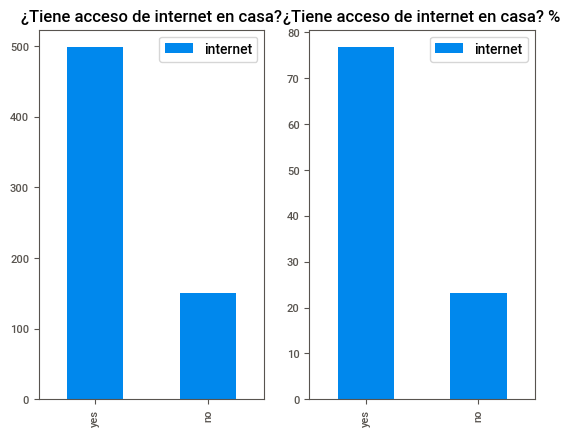

In [224]:
dfc21 = pd.DataFrame(dfc['internet'].value_counts())
dfc21p = pd.DataFrame(100 * dfc['internet'].value_counts() / len(dfc['internet']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc21.plot.bar(ax=axes[0], title='¿Tiene acceso de internet en casa?')
dfc21p.plot.bar(ax=axes[1], title='¿Tiene acceso de internet en casa? %')

In [225]:
print(pd.value_counts(dfc['pareja']))
print(' ')
print(100 * dfc['pareja'].value_counts() / len(dfc['pareja']))

no     410
yes    239
Name: pareja, dtype: int64
 
no     63.174114
yes    36.825886
Name: pareja, dtype: float64


<AxesSubplot:title={'center':'¿Tiene pareja? %'}>

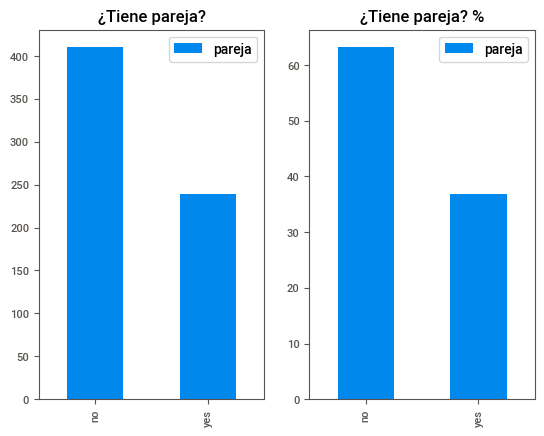

In [226]:
dfc22 = pd.DataFrame(dfc['pareja'].value_counts())
dfc22p = pd.DataFrame(100 * dfc['pareja'].value_counts() / len(dfc['pareja']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc22.plot.bar(ax=axes[0], title='¿Tiene pareja?')
dfc22p.plot.bar(ax=axes[1], title='¿Tiene pareja? %')

In [227]:
print(pd.value_counts(dfc['relacionfamilia']))
print(' ')
print(100 * dfc['relacionfamilia'].value_counts() / len(dfc['relacionfamilia']))

4    317
5    180
3    101
2     29
1     22
Name: relacionfamilia, dtype: int64
 
4    48.844376
5    27.734977
3    15.562404
2     4.468413
1     3.389831
Name: relacionfamilia, dtype: float64


<AxesSubplot:title={'center':'Calidad de relacion con familia %'}>

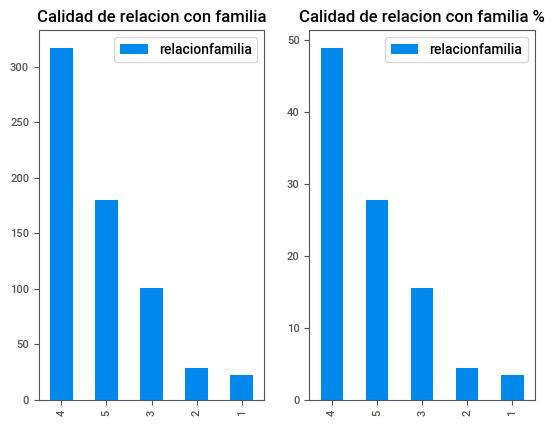

In [228]:
dfc23 = pd.DataFrame(dfc['relacionfamilia'].value_counts())
dfc23p = pd.DataFrame(100 * dfc['relacionfamilia'].value_counts() / len(dfc['relacionfamilia']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc23.plot.bar(ax=axes[0], title='Calidad de relacion con familia')
dfc23p.plot.bar(ax=axes[1], title='Calidad de relacion con familia %')

In [229]:
print(pd.value_counts(dfc['tiempolibre']))
print(' ')
print(100 * dfc['tiempolibre'].value_counts() / len(dfc['tiempolibre']))

3    251
4    178
2    107
5     68
1     45
Name: tiempolibre, dtype: int64
 
3    38.674884
4    27.426810
2    16.486903
5    10.477658
1     6.933744
Name: tiempolibre, dtype: float64


<AxesSubplot:title={'center':'Cantidad de tiempo libre %'}>

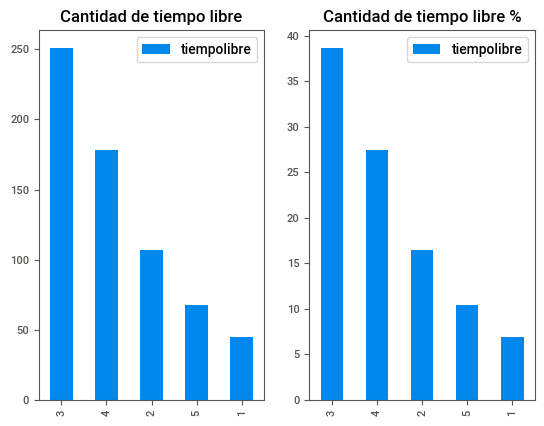

In [230]:
dfc24 = pd.DataFrame(dfc['tiempolibre'].value_counts())
dfc24p = pd.DataFrame(100 * dfc['tiempolibre'].value_counts() / len(dfc['tiempolibre']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc24.plot.bar(ax=axes[0], title='Cantidad de tiempo libre')
dfc24p.plot.bar(ax=axes[1], title='Cantidad de tiempo libre %')

In [231]:
print(pd.value_counts(dfc['salidaamigos']))
print(' ')
print(100 * dfc['salidaamigos'].value_counts() / len(dfc['salidaamigos']))

3    205
2    145
4    141
5    110
1     48
Name: salidaamigos, dtype: int64
 
3    31.587057
2    22.342065
4    21.725732
5    16.949153
1     7.395994
Name: salidaamigos, dtype: float64


<AxesSubplot:title={'center':'Sale con amigos %'}>

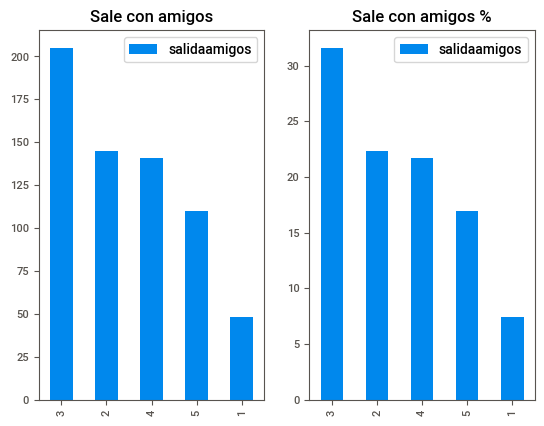

In [232]:
dfc25 = pd.DataFrame(dfc['salidaamigos'].value_counts())
dfc25p = pd.DataFrame(100 * dfc['salidaamigos'].value_counts() / len(dfc['salidaamigos']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc25.plot.bar(ax=axes[0], title='Sale con amigos')
dfc25p.plot.bar(ax=axes[1], title='Sale con amigos %')

In [233]:
print(pd.value_counts(dfc['alcohols']))
print(' ')
print(100 * dfc['alcohols'].value_counts() / len(dfc['alcohols']))

1    451
2    121
3     43
5     17
4     17
Name: alcohols, dtype: int64
 
1    69.491525
2    18.644068
3     6.625578
5     2.619414
4     2.619414
Name: alcohols, dtype: float64


<AxesSubplot:title={'center':'Consumo de alcohol en la semana %'}>

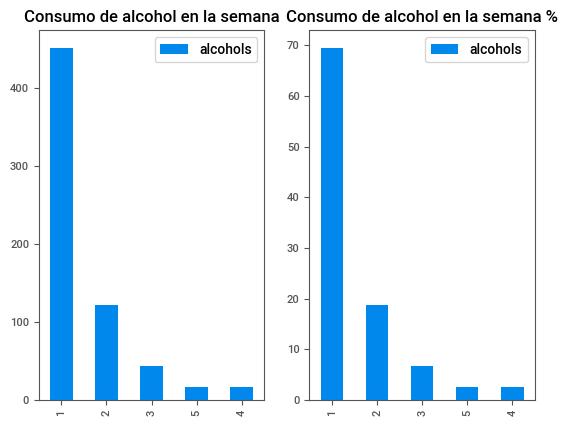

In [234]:
dfc26 = pd.DataFrame(dfc['alcohols'].value_counts())
dfc26p = pd.DataFrame(100 * dfc['alcohols'].value_counts() / len(dfc['alcohols']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc26.plot.bar(ax=axes[0], title='Consumo de alcohol en la semana')
dfc26p.plot.bar(ax=axes[1], title='Consumo de alcohol en la semana %')

In [235]:
print(pd.value_counts(dfc['alcoholw']))
print(' ')
print(100 * dfc['alcoholw'].value_counts() / len(dfc['alcoholw']))

1    247
2    150
3    120
4     87
5     45
Name: alcoholw, dtype: int64
 
1    38.058552
2    23.112481
3    18.489985
4    13.405239
5     6.933744
Name: alcoholw, dtype: float64


<AxesSubplot:title={'center':'Consumo de alcohol fds %'}>

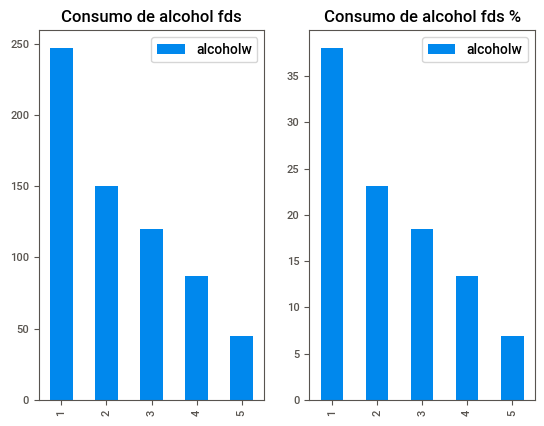

In [236]:
dfc27 = pd.DataFrame(dfc['alcoholw'].value_counts())
dfc27p = pd.DataFrame(100 * dfc['alcoholw'].value_counts() / len(dfc['alcoholw']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc27.plot.bar(ax=axes[0], title='Consumo de alcohol fds')
dfc27p.plot.bar(ax=axes[1], title='Consumo de alcohol fds %')

In [237]:
print(pd.value_counts(dfc['estadosalud']))
print(' ')
print(100 * dfc['estadosalud'].value_counts() / len(dfc['estadosalud']))

5    249
3    124
4    108
1     90
2     78
Name: estadosalud, dtype: int64
 
5    38.366718
3    19.106317
4    16.640986
1    13.867488
2    12.018490
Name: estadosalud, dtype: float64


<AxesSubplot:title={'center':'Estado de salud %'}>

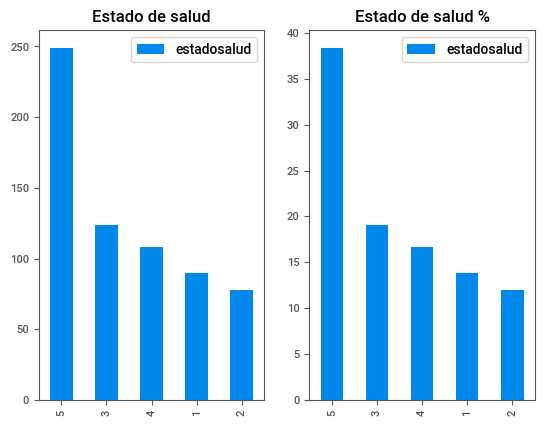

In [238]:
dfc28 = pd.DataFrame(dfc['estadosalud'].value_counts())
dfc28p = pd.DataFrame(100 * dfc['estadosalud'].value_counts() / len(dfc['estadosalud']))


fig, axes = plt.subplots(nrows=1, ncols=2)
dfc28.plot.bar(ax=axes[0], title='Estado de salud')
dfc28p.plot.bar(ax=axes[1], title='Estado de salud %')

In [ ]:
print(pd.value_counts(dfc['clasesperdidas']))
print(' ')
print(100 * dfc['clasesperdidas'].value_counts() / len(dfc['clasesperdidas']))

dfc['clasesperdidas'].value_counts().plot(kind='bar',title='Clases perdidas')

(100 * dfc['clasesperdidas'].value_counts() / len(dfc['clasesperdidas'])).plot(kind='bar', title='Clases perdidas')

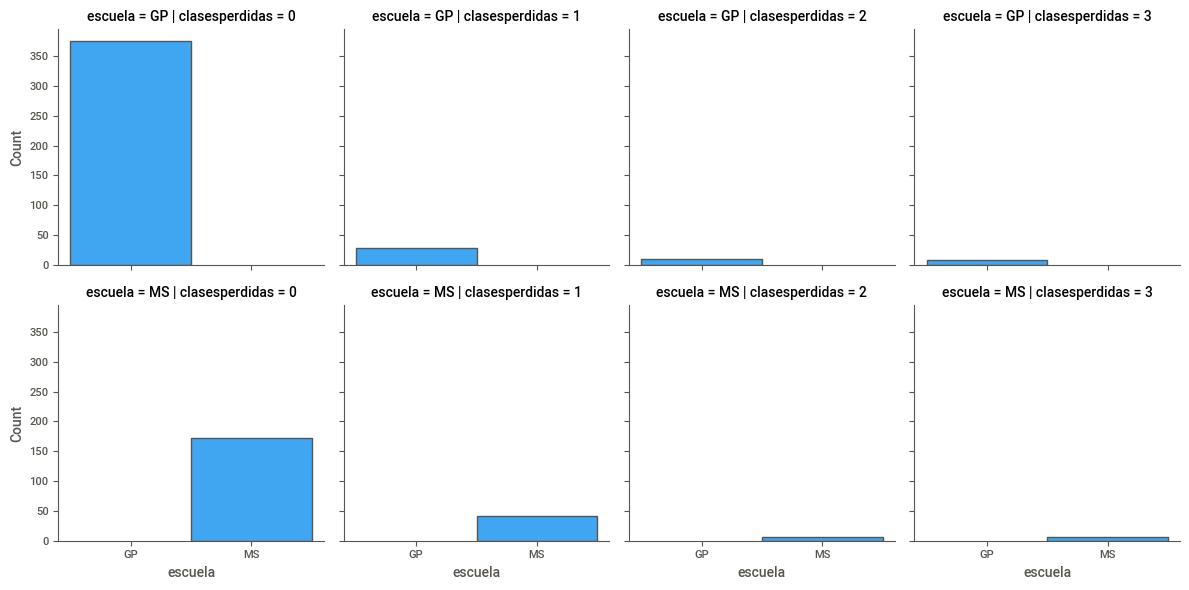

In [175]:
g = sns.FacetGrid(dfc, row = 'escuela', col = 'clasesperdidas')
g.map(sns.histplot, 'escuela')

In [ ]:
pd.crosstab(index=titanic_train["Survived"], 
                           columns=titanic_train["Sex"])


### Analisis bi-variado (categorico & categorico)

Analisis Escuela & Genero

In [275]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["genero"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["genero"], margins=True, normalize = True))

genero     F    M  All
escuela               
GP       237  186  423
MS       146   80  226
All      383  266  649
 
genero          F         M       All
escuela                              
GP       0.365177  0.286595  0.651772
MS       0.224961  0.123267  0.348228
All      0.590139  0.409861  1.000000


Analisis Escuela & ubicacion

In [280]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["ubicacion"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["ubicacion"], margins=True, normalize = True))

ubicacion    R    U  All
escuela                 
GP          78  345  423
MS         119  107  226
All        197  452  649
 
ubicacion         R         U       All
escuela                                
GP         0.120185  0.531587  0.651772
MS         0.183359  0.164869  0.348228
All        0.303544  0.696456  1.000000


Analisis Escuela y razon de la escuela

* course = Preferencia
* home = Cercania a la vivienda
* other = Otras razones
* reputation = Reputacion de la escuela

In [283]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["razón"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["razón"], margins=True, normalize = True))

razón    course  home  other  reputation  All
escuela                                      
GP          167   115     27         114  423
MS          118    34     45          29  226
All         285   149     72         143  649
 
razón      course      home     other  reputation       All
escuela                                                    
GP       0.257319  0.177196  0.041602    0.175655  0.651772
MS       0.181818  0.052388  0.069337    0.044684  0.348228
All      0.439137  0.229584  0.110940    0.220339  1.000000


Analisis Escuela y tiempo de desplazamiento

* 1 = Menos de 15 minutos
* 2 = Entre 15 minutos y 30 minutos
* 3 = Entre 30 minutos y 1 hora
* 4 = Más de 1 hora

In [285]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["tdesplaza"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["tdesplaza"], margins=True, normalize = True))

tdesplaza    1    2   3   4  All
escuela                         
GP         283  109  20  11  423
MS          83  104  34   5  226
All        366  213  54  16  649
 
tdesplaza         1         2         3         4       All
escuela                                                    
GP         0.436055  0.167951  0.030817  0.016949  0.651772
MS         0.127889  0.160247  0.052388  0.007704  0.348228
All        0.563945  0.328197  0.083205  0.024653  1.000000


Analisis Escuela y tiempo de estudio a la semana

* 1 = Menos de 2 horas
* 2 = Entre 2 y 5 horas
* 3 = Entre 5 horas y 10 horas
* 4 = Más de 10 horas

In [286]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["testudio"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["testudio"], margins=True, normalize = True))

testudio    1    2   3   4  All
escuela                        
GP        119  206  71  27  423
MS         93   99  26   8  226
All       212  305  97  35  649
 
testudio         1         2         3         4       All
escuela                                                   
GP        0.183359  0.317411  0.109399  0.041602  0.651772
MS        0.143297  0.152542  0.040062  0.012327  0.348228
All       0.326656  0.469954  0.149461  0.053929  1.000000


Analisis Escuela y clases perdidas

In [288]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["clasesperdidas"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["clasesperdidas"], margins=True, normalize = True))

clasesperdidas    0   1   2   3  All
escuela                             
GP              376  29  10   8  423
MS              173  41   6   6  226
All             549  70  16  14  649
 
clasesperdidas         0         1         2         3       All
escuela                                                         
GP              0.579353  0.044684  0.015408  0.012327  0.651772
MS              0.266564  0.063174  0.009245  0.009245  0.348228
All             0.845917  0.107858  0.024653  0.021572  1.000000


Analisis Escuela y tutorias

In [289]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["tutorias"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["tutorias"], margins=True, normalize = True))

tutorias   no  yes  All
escuela                
GP        367   56  423
MS        214   12  226
All       581   68  649
 
tutorias        no       yes       All
escuela                               
GP        0.565485  0.086287  0.651772
MS        0.329738  0.018490  0.348228
All       0.895223  0.104777  1.000000


Analisis Escuela y intenciones de estudiar en la universidad

In [290]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["univer"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["univer"], margins=True, normalize = True))

univer   no  yes  All
escuela              
GP       32  391  423
MS       37  189  226
All      69  580  649
 
univer         no       yes       All
escuela                              
GP       0.049307  0.602465  0.651772
MS       0.057011  0.291217  0.348228
All      0.106317  0.893683  1.000000


In [ ]:
Analisis Escuela y acceso a internet desde casa

In [291]:
print(pd.crosstab(index = dfc["escuela"], columns = dfc["internet"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["escuela"], columns = dfc["internet"], margins=True, normalize = True))

internet   no  yes  All
escuela                
GP         67  356  423
MS         84  142  226
All       151  498  649
 
internet        no       yes       All
escuela                               
GP        0.103236  0.548536  0.651772
MS        0.129430  0.218798  0.348228
All       0.232666  0.767334  1.000000


Analisis Genero y tiempo de estudio a la semana

* 1 = Menos de 2 horas
* 2 = Entre 2 y 5 horas
* 3 = Entre 5 horas y 10 horas
* 4 = Más de 10 horas

In [292]:
print(pd.crosstab(index = dfc["genero"], columns = dfc["testudio"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["genero"], columns = dfc["testudio"], margins=True, normalize = True))

testudio    1    2   3   4  All
genero                         
F          89  198  75  21  383
M         123  107  22  14  266
All       212  305  97  35  649
 
testudio         1         2         3         4       All
genero                                                    
F         0.137134  0.305085  0.115562  0.032357  0.590139
M         0.189522  0.164869  0.033898  0.021572  0.409861
All       0.326656  0.469954  0.149461  0.053929  1.000000


Analisis Genero y si ha sido atendido en la enfermeria

In [293]:
print(pd.crosstab(index = dfc["genero"], columns = dfc["enfermeria"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["genero"], columns = dfc["enfermeria"], margins=True, normalize = True))

enfermeria   no  yes  All
genero                   
F            70  313  383
M            58  208  266
All         128  521  649
 
enfermeria        no       yes       All
genero                                  
F           0.107858  0.482280  0.590139
M           0.089368  0.320493  0.409861
All         0.197227  0.802773  1.000000


Analisis de ubicacion y tiempo de desplazamiento

In [295]:
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["tdesplaza"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["tdesplaza"], margins=True, normalize = True))

tdesplaza    1    2   3   4  All
ubicacion                       
R           63   89  35  10  197
U          303  124  19   6  452
All        366  213  54  16  649
 
tdesplaza         1         2         3         4       All
ubicacion                                                  
R          0.097072  0.137134  0.053929  0.015408  0.303544
U          0.466872  0.191063  0.029276  0.009245  0.696456
All        0.563945  0.328197  0.083205  0.024653  1.000000


Analisis de ubicacion y clases perdidas

In [296]:
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["clasesperdidas"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["clasesperdidas"], margins=True, normalize = True))

clasesperdidas    0   1   2   3  All
ubicacion                           
R               157  31   3   6  197
U               392  39  13   8  452
All             549  70  16  14  649
 
clasesperdidas         0         1         2         3       All
ubicacion                                                       
R               0.241911  0.047766  0.004622  0.009245  0.303544
U               0.604006  0.060092  0.020031  0.012327  0.696456
All             0.845917  0.107858  0.024653  0.021572  1.000000


Analisis de ubicacion y acceso a internet en casa

In [297]:
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["internet"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["internet"], margins=True, normalize = True))

internet    no  yes  All
ubicacion               
R           68  129  197
U           83  369  452
All        151  498  649
 
internet         no       yes       All
ubicacion                              
R          0.104777  0.198767  0.303544
U          0.127889  0.568567  0.696456
All        0.232666  0.767334  1.000000


Analisis de ubicacion y consumo de alcohol en la semana
* 1 muy bajo - 5 muy alto

In [299]:
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["alcohols"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["alcohols"], margins=True, normalize = True))

alcohols     1    2   3   4   5  All
ubicacion                           
R          129   39  19   5   5  197
U          322   82  24  12  12  452
All        451  121  43  17  17  649
 
alcohols          1         2         3         4         5       All
ubicacion                                                            
R          0.198767  0.060092  0.029276  0.007704  0.007704  0.303544
U          0.496148  0.126348  0.036980  0.018490  0.018490  0.696456
All        0.694915  0.186441  0.066256  0.026194  0.026194  1.000000


Analisis de ubicacion y consumo de alcohol los fines de semana
* 1 muy bajo - 5 muy alto

In [298]:
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["alcoholw"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["ubicacion"], columns = dfc["alcoholw"], margins=True, normalize = True))

alcoholw     1    2    3   4   5  All
ubicacion                            
R           72   48   38  23  16  197
U          175  102   82  64  29  452
All        247  150  120  87  45  649
 
alcoholw          1         2         3         4         5       All
ubicacion                                                            
R          0.110940  0.073960  0.058552  0.035439  0.024653  0.303544
U          0.269646  0.157165  0.126348  0.098613  0.044684  0.696456
All        0.380586  0.231125  0.184900  0.134052  0.069337  1.000000


Analisis de padres separados y consumo de alcohol los fines de semana

* A = No viven juntos
* T = Viven juntos

In [300]:
print(pd.crosstab(index = dfc["padreseparados"], columns = dfc["alcoholw"], margins=True))
print(" ")
print(pd.crosstab(index = dfc["padreseparados"], columns = dfc["alcoholw"], margins=True, normalize = True))

alcoholw          1    2    3   4   5  All
padreseparados                            
A                39   17    9  12   3   80
T               208  133  111  75  42  569
All             247  150  120  87  45  649
 
alcoholw               1         2         3         4         5       All
padreseparados                                                            
A               0.060092  0.026194  0.013867  0.018490  0.004622  0.123267
T               0.320493  0.204931  0.171032  0.115562  0.064715  0.876733
All             0.380586  0.231125  0.184900  0.134052  0.069337  1.000000
